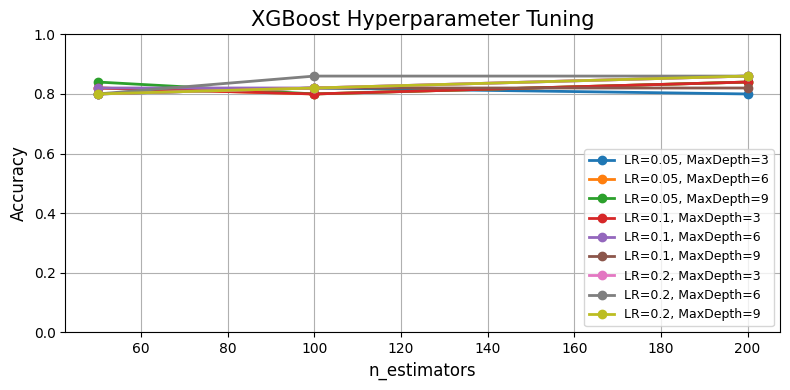

In [ ]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# --- Load and preprocess data ---
data = pd.read_csv('/content/FYP - Pamir.csv')
cat_cols = ['Valley', 'Season', 'Time', 'SL.sighted', 'Wolf.sighted', 'Country']
for col in cat_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

X = data[['Valley', 'Season', 'Time', 'T.o', 'S.o', 'G.o', 'C.o', 'O.o', 'SL.sighted', 'Wolf.sighted', 'Country']]
y = data['Predator'].astype('category').cat.codes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# --- Hyperparams for tuning ---
n_estimators_vals = [50, 100, 200]
learning_rates = [0.05, 0.1, 0.2]
max_depths = [3, 6, 9]

# --- Fixed hyperparameters ---
fixed_params = {
    'subsample': 0.7,
    'colsample_bytree': 1.0,
    'colsample_bylevel': 0.8,
    'colsample_bynode': 0.6,
    'gamma': 0,
    'reg_alpha': 0,
    'reg_lambda': 5,
    'min_child_weight': 1,
    'scale_pos_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# --- Store results ---
results = {}

for lr in learning_rates:
    for depth in max_depths:
        key = f"LR={lr}, MaxDepth={depth}"
        accs = []
        for n in n_estimators_vals:
            model = xgb.XGBClassifier(
                n_estimators=n,
                learning_rate=lr,
                max_depth=depth,
                **fixed_params
            )
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            acc = accuracy_score(y_test, preds)
            accs.append(acc)
        results[key] = accs

# --- Plot all 9 curves on one graph ---
plt.figure(figsize=(8, 4))
for key, accs in results.items():
    plt.plot(n_estimators_vals, accs, marker='o', linewidth=2, label=key)

plt.title("XGBoost Hyperparameter Tuning", fontsize=15)
plt.xlabel("n_estimators", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0.0, 1.0)
plt.legend(fontsize=9, loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


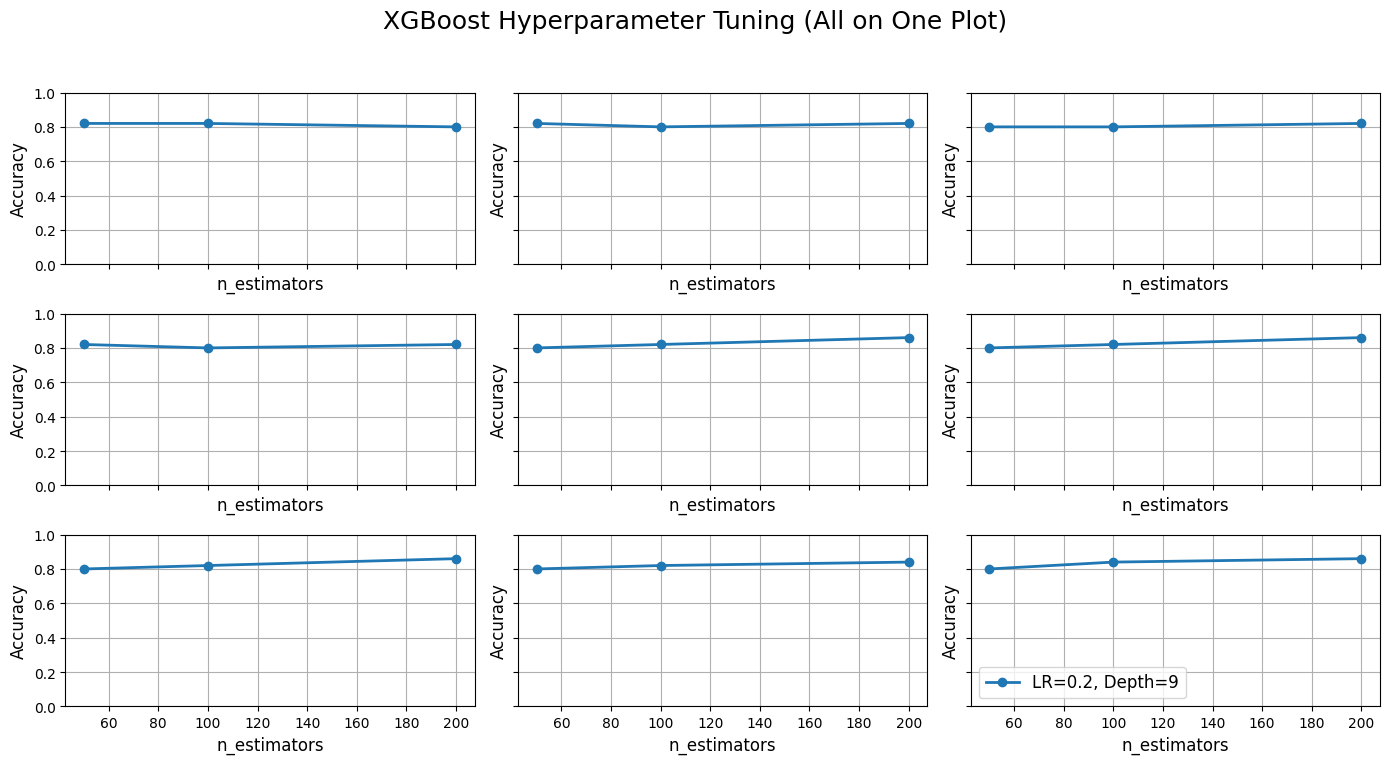

In [ ]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


data = pd.read_csv('/content/FYP - Pamir.csv')
from sklearn.preprocessing import LabelEncoder

data = data.copy()
cat_cols = ['Valley', 'Season', 'Time', 'SL.sighted', 'Wolf.sighted', 'Country']
for col in cat_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# --- Define Features and Target ---
X = data[['Valley', 'Season', 'Time', 'T.o', 'S.o', 'G.o', 'C.o', 'O.o', 'SL.sighted', 'Wolf.sighted', 'Country']]
y = data['Predator'].astype('category').cat.codes
feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Hyperparameters for µTransfer-style plots ---
n_estimators_vals = [50, 100, 200]        # x-axis
learning_rates = [0.05, 0.1, 0.2]         # y-axis (for subplot rows)
max_depths = [3, 6, 9]                    # z-axis (for subplot columns)

# --- Fixed parameters ---
fixed_params = {
    'subsample':0.7,
    'colsample_bytree':1.0,
    'colsample_bylevel':0.8,
    'colsample_bynode':0.6,
    'gamma':0,
    'reg_alpha':0,
    'reg_lambda':5,
    'min_child_weight':1,
    'scale_pos_weight':1,
    'objective':'binary:logistic',
    'eval_metric':'logloss'
}

# --- Store results ---
results = {}

# --- Loop through combinations and train model ---
for lr in learning_rates:
    for depth in max_depths:
        accs = []
        for n in n_estimators_vals:
            model = xgb.XGBClassifier(
                n_estimators=n,
                learning_rate=lr,
                max_depth=depth,
                **fixed_params
            )
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            acc = accuracy_score(y_test, preds)
            accs.append(acc)
        results[(lr, depth)] = accs

# --- Plotting µTransfer-Style Graphs ---
fig, axs = plt.subplots(len(learning_rates), len(max_depths), figsize=(14, 8), sharex=True, sharey=True)
axs = axs.flatten()  # Flatten the 2D array of axes into a 1D array

# Now iterate over this flattened array
index = 0
for lr in learning_rates:
    for depth in max_depths:
        ax = axs[index]  # Access the current axis
        ax.plot(n_estimators_vals, results[(lr, depth)], marker='o', linewidth=2, label=f"LR={lr}, Depth={depth}")
        #ax.set_title(f"LR={lr}, Depth={depth}", fontsize=14)  # If you still want titles, uncomment this line
        ax.set_xlabel("n_estimators", fontsize=12)
        ax.set_ylabel("Accuracy", fontsize=12)
        ax.grid(True)
        ax.set_ylim(0.0, 1.0)
        index += 1

# Show the legends together on the combined plot
plt.legend(fontsize=12)

fig.suptitle("XGBoost Hyperparameter Tuning (All on One Plot)", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

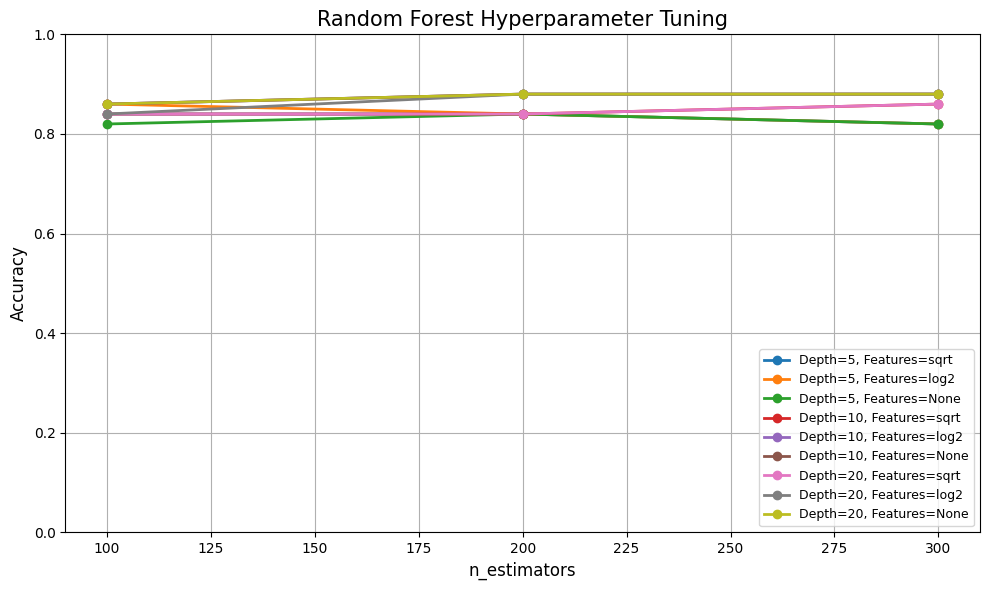

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# --- Load and preprocess your data (if not already done) ---
# Assuming `data` is already loaded
cat_cols = ['Valley', 'Season', 'Time']
for col in cat_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

X = data[['Valley', 'Season', 'Time', 'T.o', 'S.o', 'G.o', 'C.o', 'O.o']]
y = data['Predator'].astype('category').cat.codes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Hyperparameters to sweep ---
n_estimators_vals = [100, 200, 300]
max_depths = [5, 10, 20]
max_features_vals = ['sqrt', 'log2', None]

# --- Fixed parameters ---
fixed_params = {
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'bootstrap': True,
    'random_state': 42
}

# --- Store results ---
results = {}

for depth in max_depths:
    for feat in max_features_vals:
        key = f"Depth={depth}, Features={feat}"
        accs = []
        for n in n_estimators_vals:
            clf = RandomForestClassifier(
                n_estimators=n,
                max_depth=depth,
                max_features=feat,
                **fixed_params
            )
            clf.fit(X_train, y_train)
            preds = clf.predict(X_test)
            acc = accuracy_score(y_test, preds)
            accs.append(acc)
        results[key] = accs

# --- Plot all 9 lines in one figure ---
plt.figure(figsize=(10, 6))
for key, accs in results.items():
    plt.plot(n_estimators_vals, accs, marker='o', linewidth=2, label=key)

plt.title("Random Forest Hyperparameter Tuning, fontsize=15)
plt.xlabel("n_estimators", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0.0, 1.0)
plt.grid(True)
plt.legend(fontsize=9, loc='lower right')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:34:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:34:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:34:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:34:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:34:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

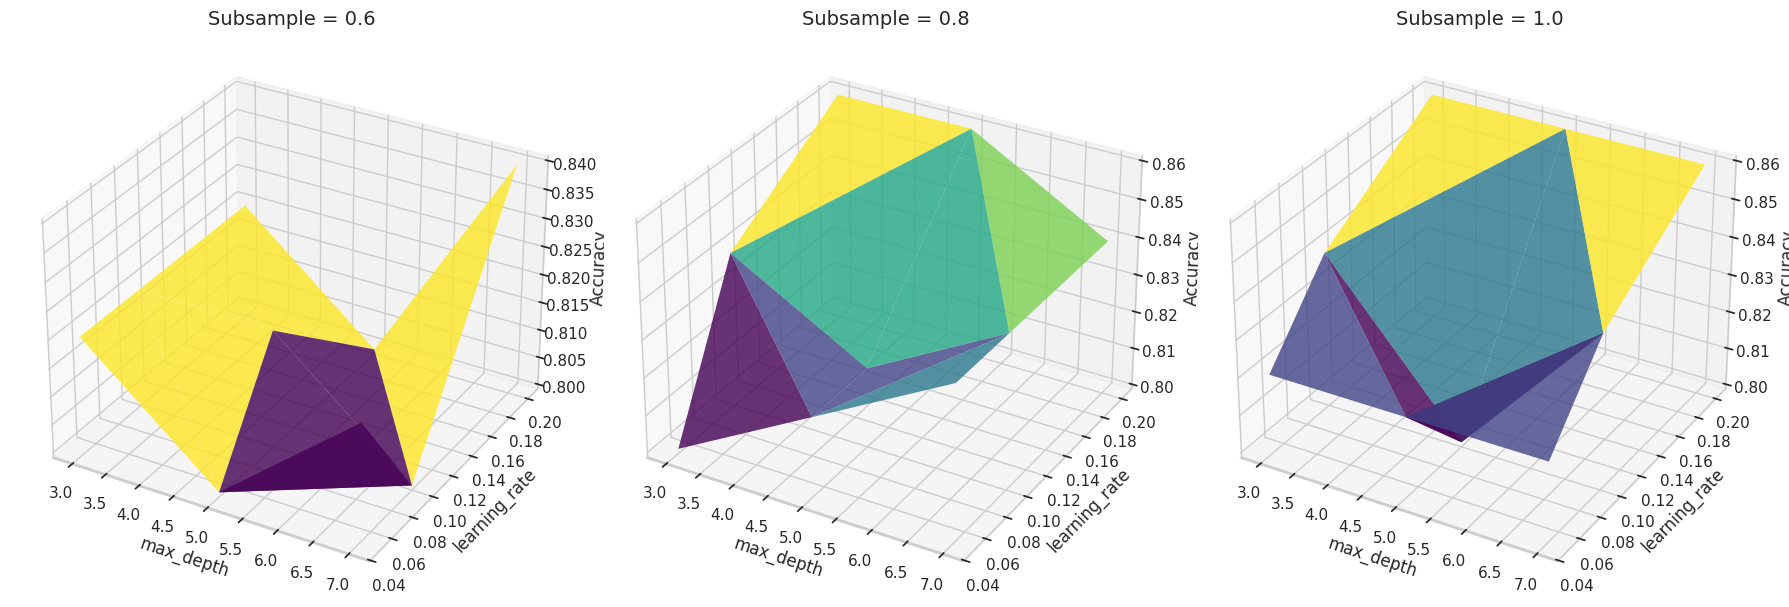

In [ ]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Hyperparameter grids
max_depths = [3, 5, 7]
learning_rates = [0.05, 0.1, 0.2]
subsamples = [0.6, 0.8, 1.0]

# Store results
results = []

for subsample in subsamples:
    for max_depth in max_depths:
        for learning_rate in learning_rates:
            model = xgb.XGBClassifier(
                n_estimators=100,
                max_depth=max_depth,
                learning_rate=learning_rate,
                subsample=subsample,
                colsample_bytree=1.0,
                colsample_bylevel=0.8,
                colsample_bynode=0.6,
                gamma=0,
                reg_alpha=0,
                reg_lambda=5,
                min_child_weight=1,
                scale_pos_weight=1,
                objective='binary:logistic',
                eval_metric='logloss',
                use_label_encoder=False,
                random_state=42
            )

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)

            results.append({
                'subsample': subsample,
                'max_depth': max_depth,
                'learning_rate': learning_rate,
                'accuracy': acc
            })

# Convert to numpy arrays for plotting
# Convert to numpy arrays for plotting
# Original: results = np.array(results)
results = pd.DataFrame(results).to_numpy() # Convert results to a pandas DataFrame first, then to numpy array
subsample_levels = sorted(set(results[:, 0]))

# Plot
fig = plt.figure(figsize=(18, 6))
for i, subsample in enumerate(subsample_levels):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')

    # Filter for current subsample
    subset = results[results[:, 0] == subsample]
    X_plot = subset[:, 1].astype(float)  # max_depth
    Y_plot = subset[:, 2].astype(float)  # learning_rate
    Z_plot = subset[:, 3].astype(float)  # accuracy

    ax.plot_trisurf(X_plot, Y_plot, Z_plot, cmap='viridis', edgecolor='none', alpha=0.8)
    ax.set_title(f"Subsample = {subsample}", fontsize=14)
    ax.set_xlabel("max_depth")
    ax.set_ylabel("learning_rate")
    ax.set_zlabel("Accuracy")

plt.tight_layout()
plt.show()


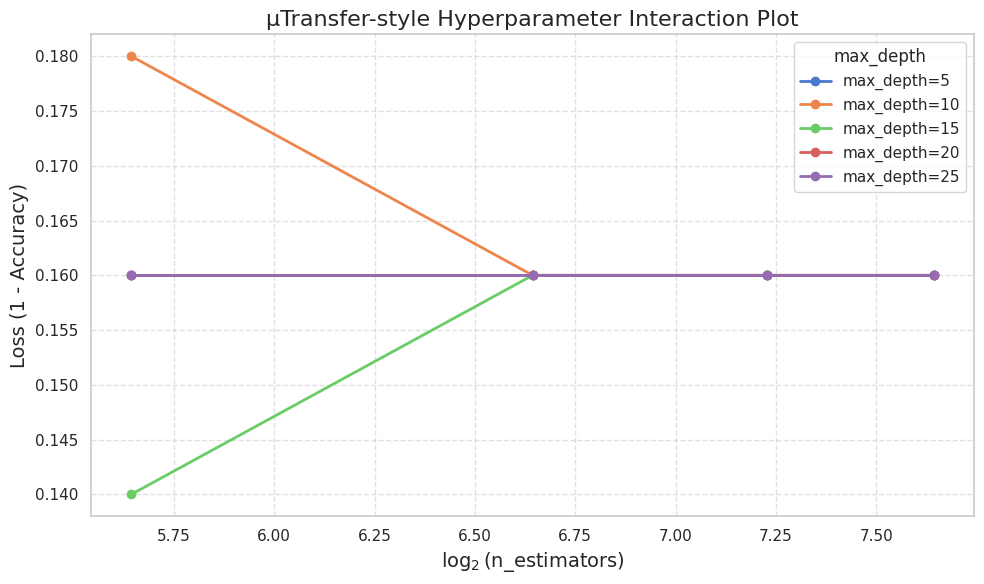

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# --- Preprocessing ---
X = data[['Valley', 'Season', 'Time', 'T.o', 'S.o', 'G.o', 'C.o', 'O.o']]
y = data['Predator'].astype('category').cat.codes
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# --- µTransfer: Hyperparameter sweep ---
depths = [5, 10, 15, 20, 25]              # "model width" analog
n_estimators_list = [50, 100, 150, 200]   # "learning rate" analog

results = []

for d in depths:
    for n in n_estimators_list:
        clf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
        clf.fit(X_train, y_train)
        acc = accuracy_score(y_test, clf.predict(X_test))
        results.append({'max_depth': d, 'n_estimators': n, 'loss': 1 - acc})

df = pd.DataFrame(results)

# --- µTransfer-style Plot ---
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", palette="muted")

for d in df['max_depth'].unique():
    subset = df[df['max_depth'] == d]
    plt.plot(np.log2(subset['n_estimators']), subset['loss'], marker='o', linewidth=2, label=f'max_depth={d}')

plt.title("µTransfer-style Hyperparameter Interaction Plot", fontsize=16)
plt.xlabel(r"$\log_2$(n_estimators)", fontsize=14)
plt.ylabel("Loss (1 - Accuracy)", fontsize=14)
plt.legend(title="max_depth", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


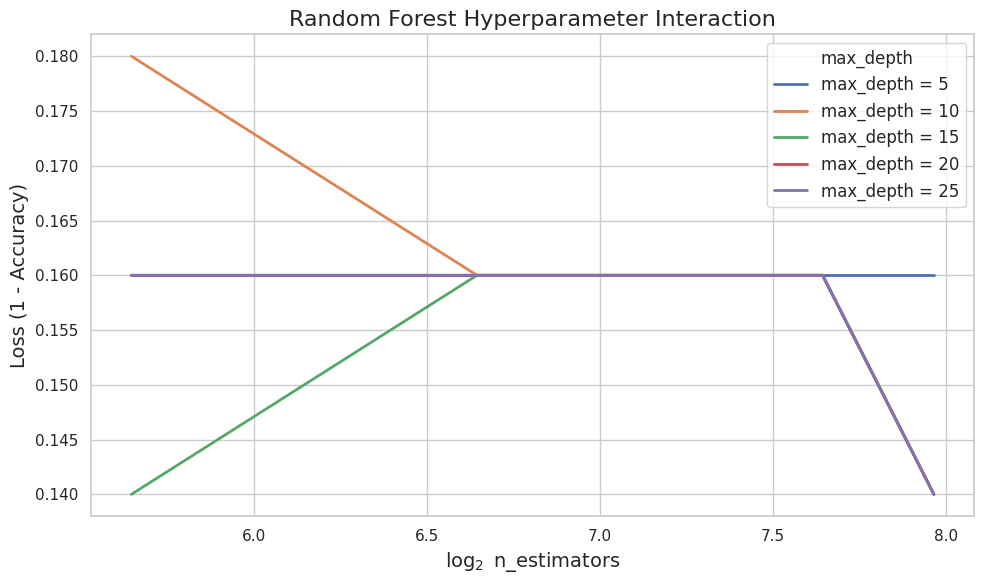

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Preprocessing (use your existing code)
X = data[['Valley', 'Season', 'Time', 'T.o', 'S.o', 'G.o', 'C.o', 'O.o']]
y = data['Predator'].astype('category').cat.codes
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# --- Hyperparameters to test ---
n_estimators_range = [50, 100, 150, 200, 250]
max_depth_values = [5, 10, 15, 20, 25]  # like width in your graph

# --- Collect results ---
results = []

for depth in max_depth_values:
    for n_est in n_estimators_range:
        model = RandomForestClassifier(n_estimators=n_est, max_depth=depth, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        loss = 1 - acc  # inverse of accuracy for "Training Loss"-like feel
        results.append({
            'n_estimators': n_est,
            'max_depth': depth,
            'loss': loss
        })

df = pd.DataFrame(results)

# --- Plot: Like µP Style Graph ---
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

for depth in sorted(df['max_depth'].unique()):
    subset = df[df['max_depth'] == depth]
    plt.plot(np.log2(subset['n_estimators']), subset['loss'], label=f'max_depth = {depth}', linewidth=2)

plt.xlabel(r'$\log_2$ n_estimators', fontsize=14)
plt.ylabel("Loss (1 - Accuracy)", fontsize=14)
plt.title("Random Forest Hyperparameter Interaction", fontsize=16)
plt.legend(title="max_depth", fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-3-843573ecc4c0>:56: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = slice_df['max_depth'].replace('None', 50).astype(int)  # Handle 'None'


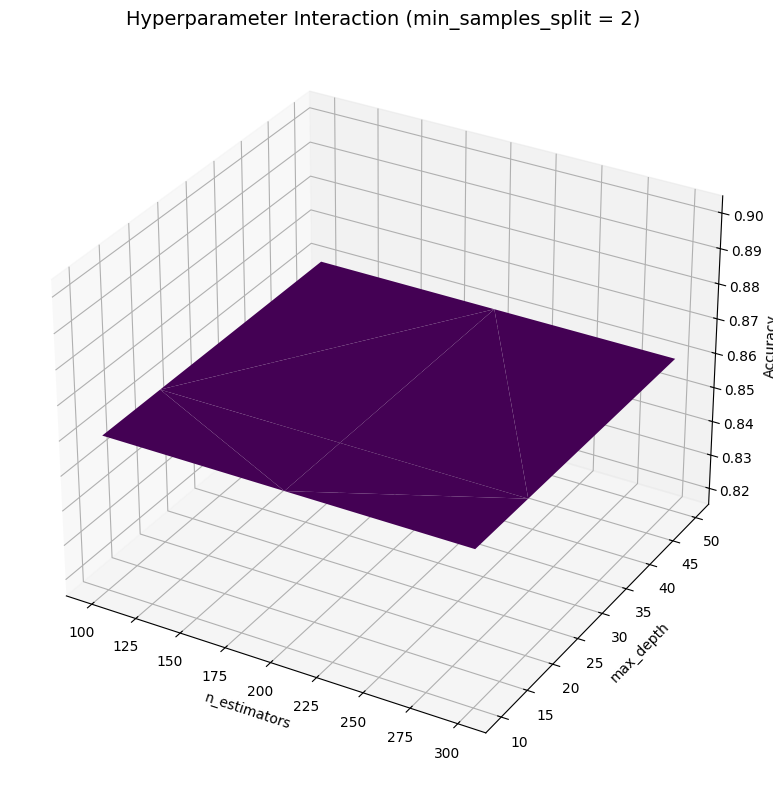

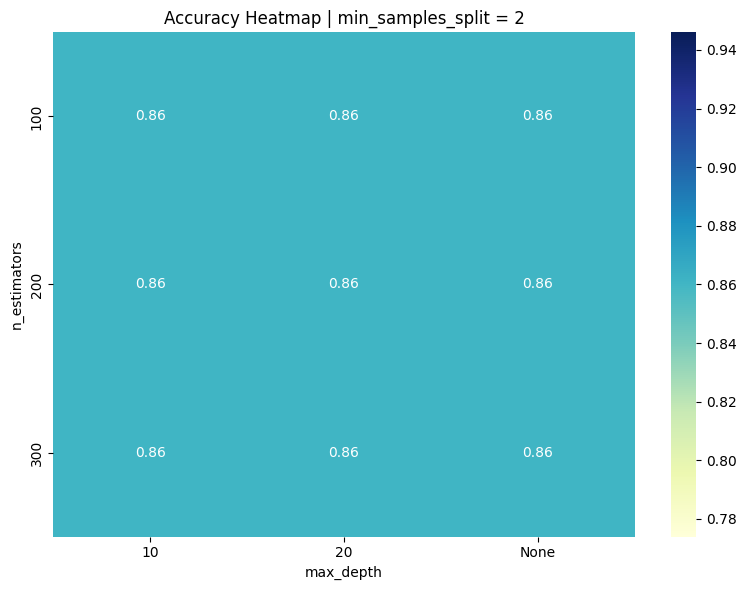

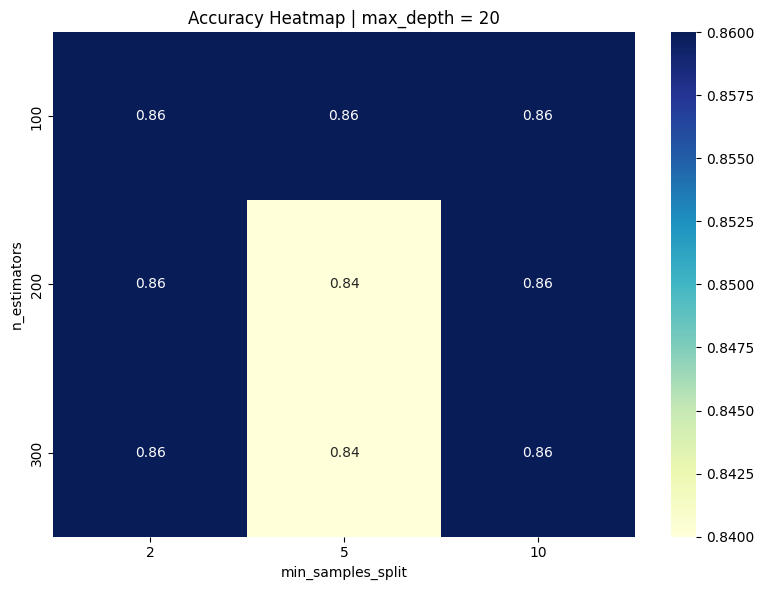

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

data= pd.read_csv('/content/FYP - Pamir.csv')

data = data.copy()
cat_cols = ['Valley', 'Season', 'Time']
for col in cat_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# --- Define Features and Target ---
X = data[['Valley', 'Season', 'Time', 'T.o', 'S.o', 'G.o', 'C.o', 'O.o']]
y = data['Predator'].astype('category').cat.codes
feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=27)

# -- Define the hyperparameter grid --
n_estimators_list = [100, 200, 300]
max_depth_list = [10, 20, None]
min_samples_split_list = [2, 5, 10]

results = []

# -- Grid Search (manual for full control) --
for n in n_estimators_list:
    for d in max_depth_list:
        for s in min_samples_split_list:
            clf = RandomForestClassifier(n_estimators=n, max_depth=d, min_samples_split=s, random_state=42)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            results.append({
                'n_estimators': n,
                'max_depth': 'None' if d is None else d,
                'min_samples_split': s,
                'accuracy': acc
            })

df_results = pd.DataFrame(results)

# --- 3D Plot: n_estimators vs max_depth vs accuracy (for fixed min_samples_split)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Choose one min_samples_split to slice on (e.g., 2)
slice_df = df_results[df_results['min_samples_split'] == 2]
x = slice_df['n_estimators']
y = slice_df['max_depth'].replace('None', 50).astype(int)  # Handle 'None'
z = slice_df['accuracy']

ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')
ax.set_title("Hyperparameter Interaction (min_samples_split = 2)", fontsize=14)
ax.set_xlabel("n_estimators")
ax.set_ylabel("max_depth")
ax.set_zlabel("Accuracy")
plt.tight_layout()
plt.show()

# --- Heatmaps for pairwise interactions (fixed third param) ---
for fixed_param, value in [('min_samples_split', 2), ('max_depth', 20)]:
    sub_df = df_results[df_results[fixed_param] == value]
    pivot = sub_df.pivot(index='n_estimators', columns='max_depth' if fixed_param != 'max_depth' else 'min_samples_split', values='accuracy')

    plt.figure(figsize=(8, 6))
    sns.heatmap(pivot, annot=True, cmap='YlGnBu')
    plt.title(f"Accuracy Heatmap | {fixed_param} = {value}")
    plt.xlabel(pivot.columns.name)
    plt.ylabel(pivot.index.name)
    plt.tight_layout()
    plt.show()


# **APP**

In [ ]:
import gradio as gr
import pickle
import numpy as np

# Load model
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

# Class mapping to images
predator_images = {
    0: "Predator_Wolf.jpg",
    1: "Predator_SL.jpg"
}

# Dropdown options
options = {
    "Valley": ["L.Pamir", "T.Pamir", "U.Wakhan", "L.Wakhan", "Broghil", "Chipursan", "Misgar"],
    "Season": ["Summer", "Autumn", "Spring", "Winter"],
    "Country": ["Afghanistan", "Pakistan", "Tajikistan"],
    "Time": ["Morning", "Evening", "Night"],
    "Prey Age": ["Kid", "Adult", "Mix"],
    "Prey Sex": ["Male", "Female", "Both"]
}

# Encoders for categorical variables
encoders = {k: {v: i for i, v in enumerate(vs)} for k, vs in options.items()}

def predict(valley, season, country, time, prey_age, prey_sex, T_o, C_o, G_o, S_o, O_o):
    try:
        encoded = [
            encoders["Valley"][valley],
            encoders["Season"][season],
            encoders["Country"][country],
            encoders["Time"][time],
            encoders["Prey Age"][prey_age],
            encoders["Prey Sex"][prey_sex]
        ]
        numeric = [T_o, C_o, G_o, S_o, O_o]
        input_vector = np.array(encoded + numeric).reshape(1, -1)
        pred = model.predict(input_vector)[0]
        name = "Snow Leopard" if pred == 1 else "Wolf"
        return name, predator_images[pred]
    except Exception as e:
        return f"Error: {e}", None

# Build GUI
with gr.Blocks() as app:
    gr.Markdown("## 🐾 Predator Risk Predictor")

    with gr.Row():
        valley = gr.Dropdown(label="Valley", choices=options["Valley"])
        season = gr.Dropdown(label="Season", choices=options["Season"])
        country = gr.Dropdown(label="Country", choices=options["Country"])

    with gr.Row():
        time = gr.Dropdown(label="Time", choices=options["Time"])
        age = gr.Dropdown(label="Prey Age", choices=options["Prey Age"])
        sex = gr.Dropdown(label="Prey Sex", choices=options["Prey Sex"])

    gr.Markdown("### Livestock Count Inputs")
    T_o = gr.Slider(0, 100, step=1, label="Total livestock owned")
    C_o = gr.Slider(0, 100, step=1, label="Cattle owned")
    G_o = gr.Slider(0, 100, step=1, label="Goats owned")
    S_o = gr.Slider(0, 100, step=1, label="Sheep owned")
    O_o = gr.Slider(0, 100, step=1, label="Other livestock owned")

    pred_btn = gr.Button("Predict Predator")
    pred_label = gr.Textbox(label="Predicted Predator")
    pred_image = gr.Image(label="Predator Image")

    pred_btn.click(
        predict,
        inputs=[valley, season, country, time, age, sex, T_o, C_o, G_o, S_o, O_o],
        outputs=[pred_label, pred_image]
    )

app.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://aaac9765a10e4cf0c8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import pickle
import numpy as np

# Load model
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

# Class mapping for final output image
predator_images = {
    0: "Predator_Wolf.jpg",
    1: "Predator_SL.jpg"
}

# Categorical options
options = {
    "Valley": ["L.Pamir", "T.Pamir", "U.Wakhan", "L.Wakhan", "Broghil", "Chipursan", "Misgar"],
    "Season": ["Summer", "Autumn", "Spring", "Winter"],
    "Country": ["Afghanistan", "Pakistan", "Tajikistan"],
    "Time": ["Morning", "Evening", "Night"],
    "Prey Age": ["Kid", "Adult", "Mix"],
    "Prey Sex": ["Male", "Female", "Both"]
}

# Encoding dictionary
encoders = {k: {v: i for i, v in enumerate(vals)} for k, vals in options.items()}

# Store selected values
user_input = {}

def update_vector(**kwargs):
    user_input.update(kwargs)
    return str(user_input)

def predict(T_o, C_o, G_o, S_o, O_o):
    if len(user_input) < 6:
        return "Fill all features first", None
    try:
        cat_values = [encoders[key][user_input[key]] for key in options]
        nums = [T_o, C_o, G_o, S_o, O_o]
        input_vector = np.array(cat_values + nums).reshape(1, -1)
        pred = model.predict(input_vector)[0]
        name = "Snow Leopard" if pred == 1 else "Wolf"
        return name, predator_images[pred]
    except Exception as e:
        return f"Error: {e}", None

with gr.Blocks() as app:
    gr.Markdown("## 🐾 Real-time Predator Risk Predictor")

    with gr.Row():
        valley = gr.Dropdown(label="Valley", choices=options["Valley"])
        season = gr.Dropdown(label="Season", choices=options["Season"])
        country = gr.Dropdown(label="Country", choices=options["Country"])

    with gr.Row():
        time = gr.Dropdown(label="Time", choices=options["Time"])
        age = gr.Dropdown(label="Prey Age", choices=options["Prey Age"])
        sex = gr.Dropdown(label="Prey Sex", choices=options["Prey Sex"])

    vector = gr.Textbox(label="Selected Inputs")
    update = gr.Button("Update Vector")
    update.click(update_vector, inputs=[valley, season, country, time, age, sex], outputs=vector)

    gr.Markdown("### Livestock Count")
    T_o = gr.Slider(0, 100, step=1, label="T.o")
    C_o = gr.Slider(0, 100, step=1, label="C.o")
    G_o = gr.Slider(0, 100, step=1, label="G.o")
    S_o = gr.Slider(0, 100, step=1, label="S.o")
    O_o = gr.Slider(0, 100, step=1, label="O.o")

    pred_btn = gr.Button("Predict")
    pred_text = gr.Textbox(label="Predator")
    pred_image = gr.Image(label="Predator Image")

    pred_btn.click(predict, inputs=[T_o, C_o, G_o, S_o, O_o], outputs=[pred_text, pred_image])

app.launch()

/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1018: UserWarning: Expected 0 arguments for function <function update_vector at 0x7de636a898a0>, received 6.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1026: UserWarning: Expected maximum 0 arguments for function <function update_vector at 0x7de636a898a0>, received 6.
  warnings.warn(


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f188a2e6d3a7628b80.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.4 MB/s eta 0:00:00


In [ ]:
python app_gradio.py

In [ ]:
# First part: Data preparation and model training
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
import xgboost as xgb
import joblib

# Load data
data = pd.read_csv("FYP - Pamir (2).csv")

# Encode categorical variables
cat_cols = ['Valley', 'Season', 'Country', 'Time', 'Prey age', 'Prey sex']
encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le

# Save encoders
joblib.dump(encoders, "encoders.pkl")

# Prepare features and target - IMPORTANT: Use consistent order
feature_order = ['Valley', 'Season', 'Country', 'Time', 'Prey age', 'Prey sex',
                 'T.o', 'C.o', 'G.o', 'S.o', 'O.o']
X = data[feature_order]  # Use the defined order
y = data['Predator'].astype('category').cat.codes

# Resampling
X_resampled, y_resampled = SMOTETomek(random_state=42).fit_resample(X, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=7,
    learning_rate=0.2,
    subsample=0.7,
    colsample_bytree=1.0,
    colsample_bylevel=0.8,
    colsample_bynode=0.6,
    gamma=0,
    reg_alpha=0,
    reg_lambda=5,
    min_child_weight=1,
    scale_pos_weight=1,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

# Fit model
xgb_model.fit(X_train, y_train)

# Save model
joblib.dump(xgb_model, "model.pkl")

# Second part: Gradio app
gradio_code = '''
import gradio as gr
import pandas as pd
import joblib

# Load model and encoders
model = joblib.load("model.pkl")
encoders = joblib.load("encoders.pkl")

# Use the SAME feature order as in training
feature_order = ['Valley', 'Season', 'Country', 'Time', 'Prey age', 'Prey sex',
                 'T.o', 'C.o', 'G.o', 'S.o', 'O.o']

def get_choices(col):
    return list(encoders[col].classes_)

def predict(valley, season, country, time, age, sex, T, C, G, S, O):
    # Create DataFrame with EXACTLY the same column order as training
    input_data = {
        'Valley': valley, 'Season': season, 'Country': country,
        'Time': time, 'Prey age': age, 'Prey sex': sex,
        'T.o': T, 'C.o': C, 'G.o': G, 'S.o': S, 'O.o': O
    }
    df = pd.DataFrame([input_data])[feature_order]  # Enforce order

    # Encode categorical features
    for col in ['Valley', 'Season', 'Country', 'Time', 'Prey age', 'Prey sex']:
        df[col] = encoders[col].transform(df[col])

    probs = model.predict_proba(df)[0]
    return f"🧊 Snow Leopard: {probs[1]*100:.1f}%\\n🐺 Wolf: {probs[0]*100:.1f}%"

demo = gr.Interface(
    fn=predict,
    inputs=[
        gr.Dropdown(label="Valley", choices=get_choices("Valley")),
        gr.Dropdown(label="Season", choices=get_choices("Season")),
        gr.Dropdown(label="Country", choices=get_choices("Country")),
        gr.Dropdown(label="Time", choices=get_choices("Time")),
        gr.Dropdown(label="Prey Age", choices=get_choices("Prey age")),
        gr.Dropdown(label="Prey Sex", choices=get_choices("Prey sex")),
        gr.Number(label="Total Livestock (T.o)", value=30),
        gr.Number(label="Cattle (C.o)", value=10),
        gr.Number(label="Goats (G.o)", value=5),
        gr.Number(label="Sheep (S.o)", value=7),
        gr.Number(label="Other (O.o)", value=2)
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="🐾 Predator Risk Predictor",
    description="Predict if Snow Leopard or Wolf is more likely based on conditions."
)

demo.launch(share=True)
'''

with open("app_gradio.py", "w") as f:
    f.write(gradio_code)

In [ ]:
!python app_gradio.py

* Running on local URL:  http://127.0.0.1:7863
* Running on public URL: https://bada61d6f40715e16c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
Keyboard interruption in main thread... closing server.
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 3019, in block_thread
    time.sleep(0.1)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/content/app_gradio.py", line 53, in <module>
    demo.launch(share=True)
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 2925, in launch
    self.block_thread()
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 3023, in block_thread
    self.server.close()
  File "/usr/local/lib/python3.11/dist-p

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import pandas as pd
import joblib
from PIL import Image
import os

# Load model and encoders
model = joblib.load("model.pkl")
encoders = joblib.load("encoders.pkl")

# Load your images (replace with your actual image paths)
snow_leopard_img = "/content/SL.jpg"  # or .png
wolf_img = "/content/Greywolf.jpg"  # or .png

# Check if images exist, otherwise use placeholder
if not os.path.exists(snow_leopard_img):
    snow_leopard_img = None
if not os.path.exists(wolf_img):
    wolf_img = None

# Use the SAME feature order as in training
feature_order = ['Valley', 'Season', 'Country', 'Time', 'Prey age', 'Prey sex',
                 'T.o', 'C.o', 'G.o', 'S.o', 'O.o']

def get_choices(col):
    return list(encoders[col].classes_)

def predict(valley, season, country, time, age, sex, T, C, G, S, O):
    # Create DataFrame with EXACTLY the same column order as training
    input_data = {
        'Valley': valley, 'Season': season, 'Country': country,
        'Time': time, 'Prey age': age, 'Prey sex': sex,
        'T.o': T, 'C.o': C, 'G.o': G, 'S.o': S, 'O.o': O
    }
    df = pd.DataFrame([input_data])[feature_order]  # Enforce order

    # Encode categorical features
    for col in ['Valley', 'Season', 'Country', 'Time', 'Prey age', 'Prey sex']:
        df[col] = encoders[col].transform(df[col])

    probs = model.predict_proba(df)[0]

    # Create output with images
    output_html = f"""
    <div style='display: flex; justify-content: space-around; align-items: center;'>
        <div style='text-align: center;'>
            <img src='{snow_leopard_img or "https://placeholder.com/150"}' alt='Snow Leopard' width='150'><br>
            <span style='font-size: 18px; font-weight: bold;'>🧊 Snow Leopard: {probs[1]*100:.1f}%</span>
        </div>
        <div style='text-align: center;'>
            <img src='{wolf_img or "https://placeholder.com/150"}' alt='Wolf' width='150'><br>
            <span style='font-size: 18px; font-weight: bold;'>🐺 Wolf: {probs[0]*100:.1f}%</span>
        </div>
    </div>
    """

    return output_html

# Create the interface
with gr.Blocks() as demo:
    gr.Markdown("# 🐾 Predator Risk Predictor")
    gr.Markdown("Predict if Snow Leopard or Wolf is more likely based on conditions.")

    with gr.Row():
        with gr.Column():
            valley = gr.Dropdown(label="Valley", choices=get_choices("Valley"))
            season = gr.Dropdown(label="Season", choices=get_choices("Season"))
            country = gr.Dropdown(label="Country", choices=get_choices("Country"))
            time = gr.Dropdown(label="Time", choices=get_choices("Time"))
            age = gr.Dropdown(label="Prey Age", choices=get_choices("Prey age"))
            sex = gr.Dropdown(label="Prey Sex", choices=get_choices("Prey sex"))
        with gr.Column():
            T = gr.Number(label="Total Livestock (T.o)", value=30)
            C = gr.Number(label="Cattle (C.o)", value=10)
            G = gr.Number(label="Goats (G.o)", value=5)
            S = gr.Number(label="Sheep (S.o)", value=7)
            O = gr.Number(label="Other (O.o)", value=2)

    submit_btn = gr.Button("Predict")

    with gr.Row():
        output = gr.HTML(label="Prediction Results")

    submit_btn.click(
        fn=predict,
        inputs=[valley, season, country, time, age, sex, T, C, G, S, O],
        outputs=output
    )

demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://d4bdd23223b32c463d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7864 <> https://d4bdd23223b32c463d.gradio.live


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [ ]:
data = pd.read_csv('/content/FYP - Pamir.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/FYP - Pamir.csv'

In [ ]:
data.head()

,Total.predation,Country,Valley,Season,Time,Prey sex,Prey age,SL.sighted,Wolf.sighted,T.o,G.o,S.o,C.o,O.o,Predator
0,1,AFG,L.PAMIR,Summer,Evening,Female,Adult,No,Yes,24,0,0,20,4,Wolf
1,1,AFG,L.PAMIR,Autumn,Evening,Female,Mix,No,Yes,17,3,2,10,2,SL
2,1,AFG,L.PAMIR,Spring,Evening,Female,Adult,No,Yes,17,3,2,10,2,SL
3,1,AFG,L.PAMIR,Summer,Evening,Female,Adult,No,Yes,16,5,8,2,1,Wolf
4,1,AFG,L.PAMIR,Summer,Evening,Male,Adult,No,Yes,16,5,8,2,1,Wolf


Data Preprocessing

In [ ]:
categorical_cols = ["Valley", "Season", "Time", 'Prey sex', 'Prey age', 'Country', 'SL.sighted',	'Wolf.sighted']
ohe = OneHotEncoder(drop='first', sparse_output=False)
data_encoded = pd.DataFrame(ohe.fit_transform(data[categorical_cols]))
data_encoded.columns = ohe.get_feature_names_out()

X = data_encoded
y = data['Predator']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
data.head()

,Total.predation,Country,Valley,Season,Time,Prey sex,Prey age,SL.sighted,Wolf.sighted,T.o,G.o,S.o,C.o,O.o,Predator
0,1,AFG,L.PAMIR,Summer,Evening,Female,Adult,No,Yes,24,0,0,20,4,Wolf
1,1,AFG,L.PAMIR,Autumn,Evening,Female,Mix,No,Yes,17,3,2,10,2,SL
2,1,AFG,L.PAMIR,Spring,Evening,Female,Adult,No,Yes,17,3,2,10,2,SL
3,1,AFG,L.PAMIR,Summer,Evening,Female,Adult,No,Yes,16,5,8,2,1,Wolf
4,1,AFG,L.PAMIR,Summer,Evening,Male,Adult,No,Yes,16,5,8,2,1,Wolf


In [ ]:
X = data[["Valley", "Season", "Time", 'Prey sex', 'Prey age', 'Country', 'SL.sighted',	'Wolf.sighted']]
y = data["Predator"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

# **EDA**

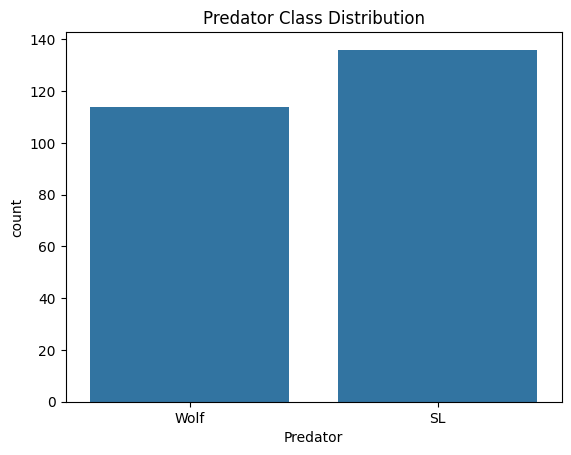

In [ ]:
sns.countplot(x='Predator', data=data)
plt.title("Predator Class Distribution")
plt.show()

In [ ]:
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())

   Total.predation Country   Valley  Season     Time Prey sex Prey age  \
0                1     AFG  L.PAMIR  Summer  Evening   Female    Adult   
1                1     AFG  L.PAMIR  Autumn  Evening   Female      Mix   
2                1     AFG  L.PAMIR  Spring  Evening   Female    Adult   
3                1     AFG  L.PAMIR  Summer  Evening   Female    Adult   
4                1     AFG  L.PAMIR  Summer  Evening     Male    Adult   

  SL.sighted Wolf.sighted  T.o  G.o  S.o  C.o  O.o Predator  
0         No          Yes   24    0    0   20    4     Wolf  
1         No          Yes   17    3    2   10    2       SL  
2         No          Yes   17    3    2   10    2       SL  
3         No          Yes   16    5    8    2    1     Wolf  
4         No          Yes   16    5    8    2    1     Wolf  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           -----------

<ipython-input-38-f55c53a95f80>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_counts, x='Season', y='Total.predation', palette='Blues')


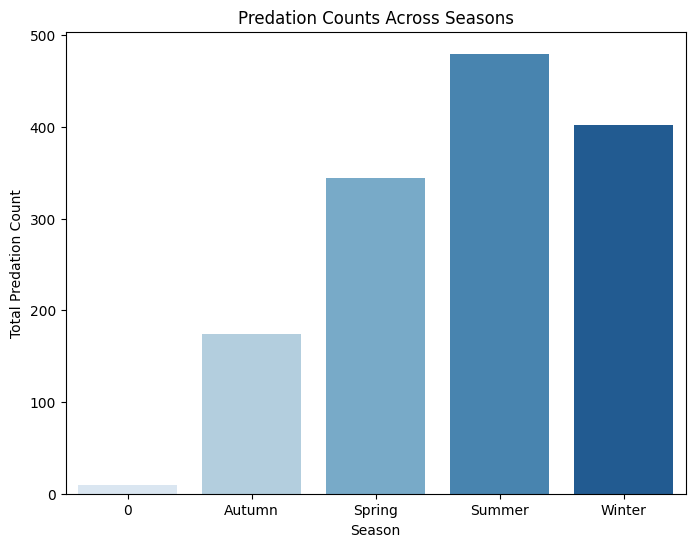

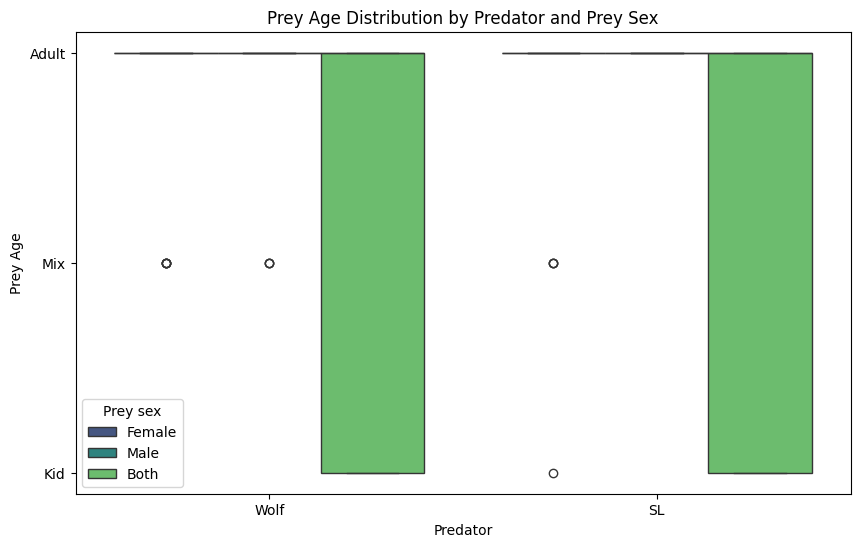

In [ ]:
import plotly.express as px

season_counts = data.groupby('Season')['Total.predation'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=season_counts, x='Season', y='Total.predation', palette='Blues')
plt.title("Predation Counts Across Seasons")
plt.xlabel("Season")
plt.ylabel("Total Predation Count")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Predator', y='Prey age', hue='Prey sex', palette='viridis')
plt.title("Prey Age Distribution by Predator and Prey Sex")
plt.xlabel("Predator")
plt.ylabel("Prey Age")
plt.show()

if 'Longitude' in data.columns and 'Latitude' in data.columns:
    fig = px.scatter_mapbox(data, lat="Latitude", lon="Longitude", color="Predator", size="Total.predation",
                            hover_name="Valley", mapbox_style="carto-positron", title="Spatial Distribution of Predation")
    fig.show()


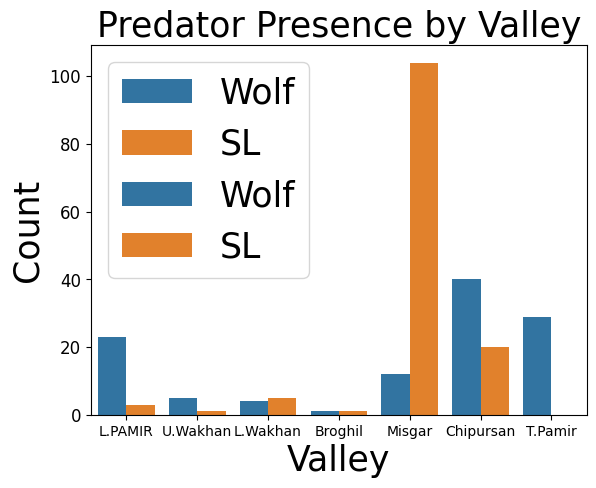

In [ ]:
sns.countplot(x='Valley', hue='Predator', data=data)
sns.countplot(x='Valley', hue='Predator', data=data)
plt.title("Predator Presence by Valley", fontsize=25)  # Increase title font size
plt.xlabel("Valley", fontsize=25)  # Increase x-axis label font size
plt.ylabel("Count", fontsize=25)  # Increase y-axis label font size
plt.xticks(fontsize=10)  # Increase x-axis tick label font size
plt.yticks(fontsize=12)  # Increase y-axis tick label font size
plt.legend(fontsize=25)  # Increase legend font size
plt.show()

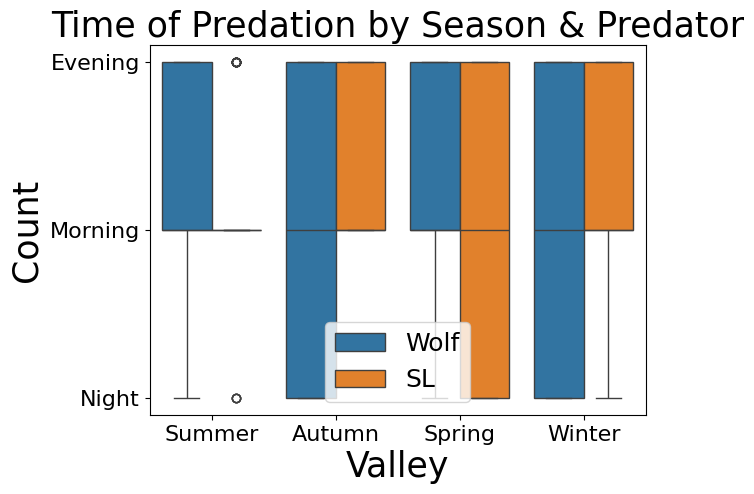

In [ ]:
sns.boxplot(x='Season', y='Time', hue='Predator', data=data)
plt.title("Time of Predation by Season & Predator", fontsize=25)  # Increase title font size
plt.xlabel("Valley", fontsize=25)  # Increase x-axis label font size
plt.ylabel("Count", fontsize=25)  # Increase y-axis label font size
plt.xticks(fontsize=16)  # Increase x-axis tick label font size
plt.yticks(fontsize=16)  # Increase y-axis tick label font size
plt.legend(fontsize=18)  # Increase legend font size
plt.show()

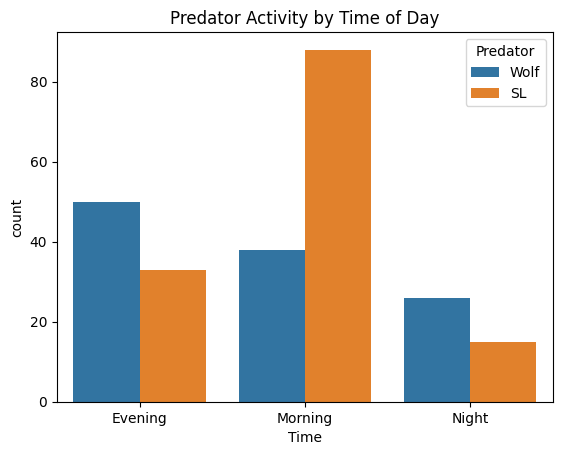

In [ ]:
sns.countplot(x='Time', hue='Predator', data=data)
plt.title("Predator Activity by Time of Day")
plt.show()

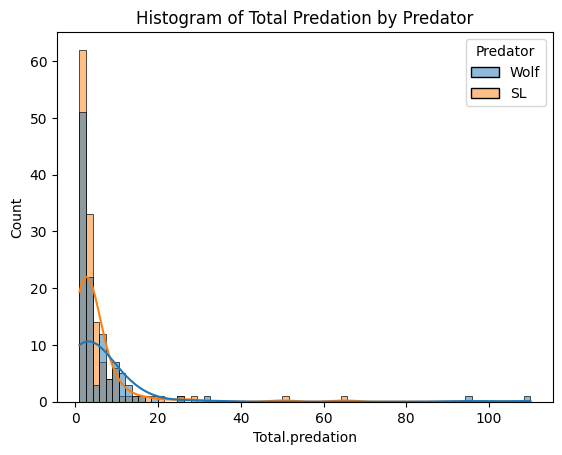

In [ ]:
sns.histplot(data=data, x='Total.predation', hue='Predator', kde=True)
plt.title("Histogram of Total Predation by Predator")
plt.show()

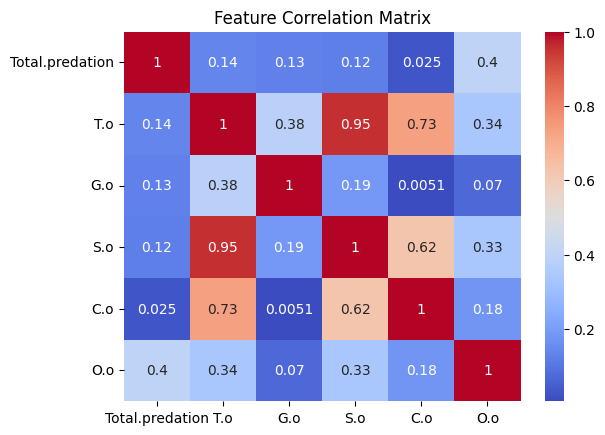

In [ ]:
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

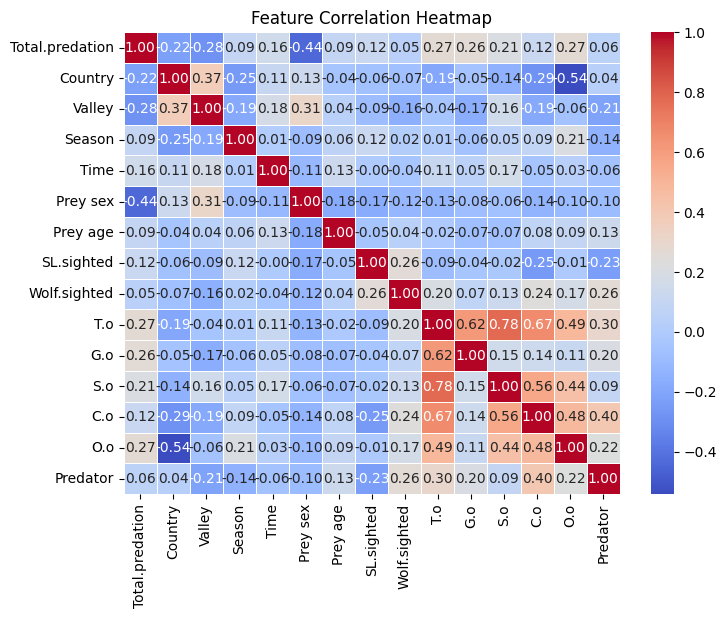

<ipython-input-34-8078618f8252>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Predator", y="Total.predation", data=data, palette="muted")


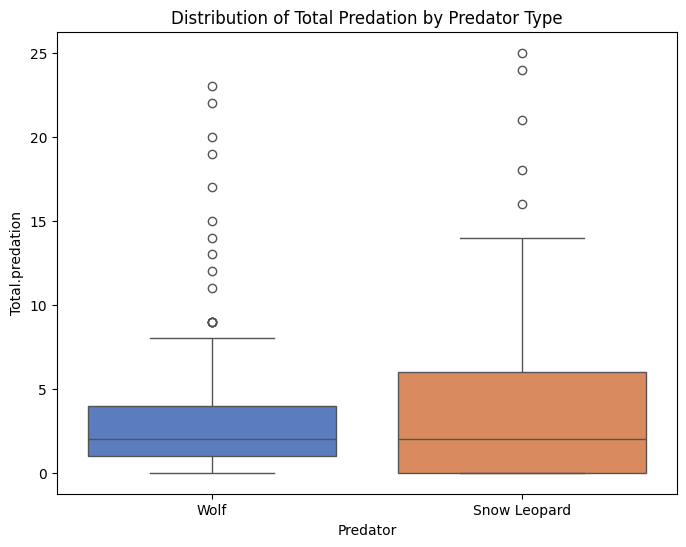

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplots for Numeric Features
plt.figure(figsize=(8, 6))
sns.boxplot(x="Predator", y="Total.predation", data=data, palette="muted")
plt.title("Distribution of Total Predation by Predator Type")
plt.xticks(ticks=[0, 1], labels=["Wolf", "Snow Leopard"])
plt.show()

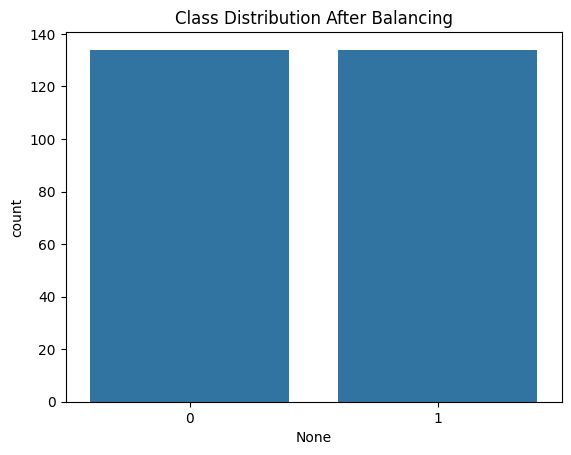

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
sns.countplot(x=y_resampled)
plt.title("Class Distribution After Balancing")
plt.show()

## **Random Forest**

Fitting 5 folds for each of 50 candidates, totalling 250 fits

🔍 Best Parameters Found:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}

 Accuracy (Training): 1.0
 Accuracy (Testing): 0.86

 Classification Report (Training):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        91

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


 Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.83      0.87      0.85        23

    accuracy                           0.86        50
   macro avg       0.86      0.86      0.86        50
weighted avg       0.86      0.86      0.86        50



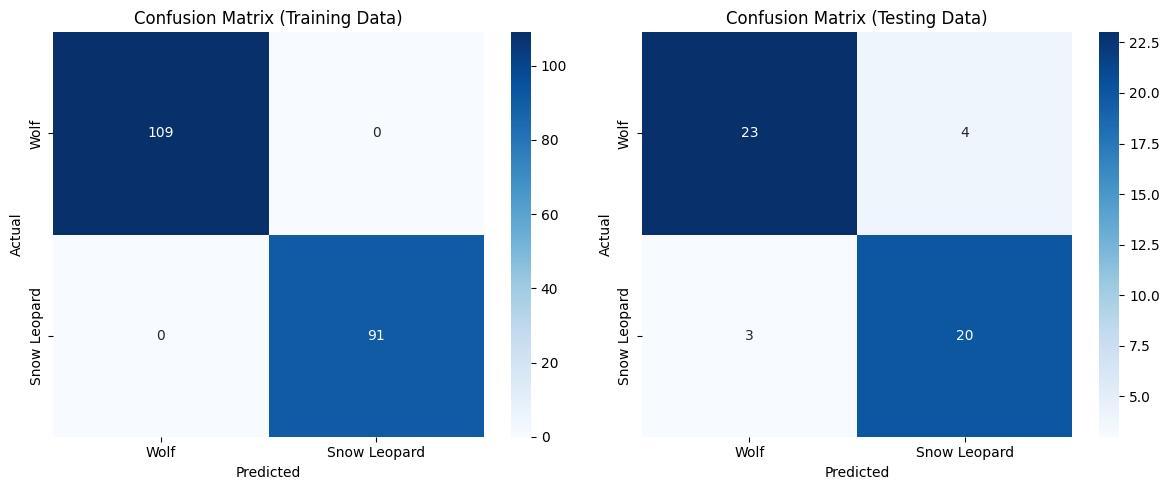

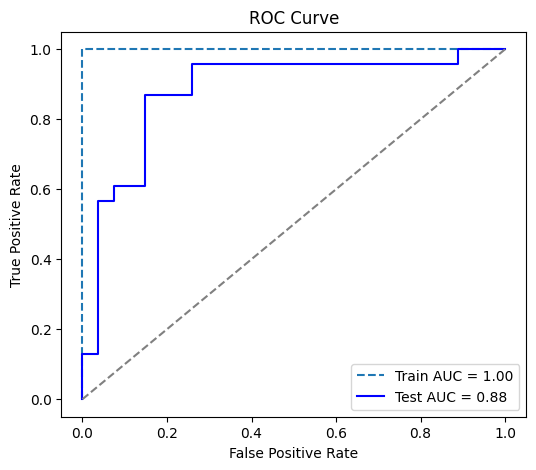

<ipython-input-5-79931b1ae28c>:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')


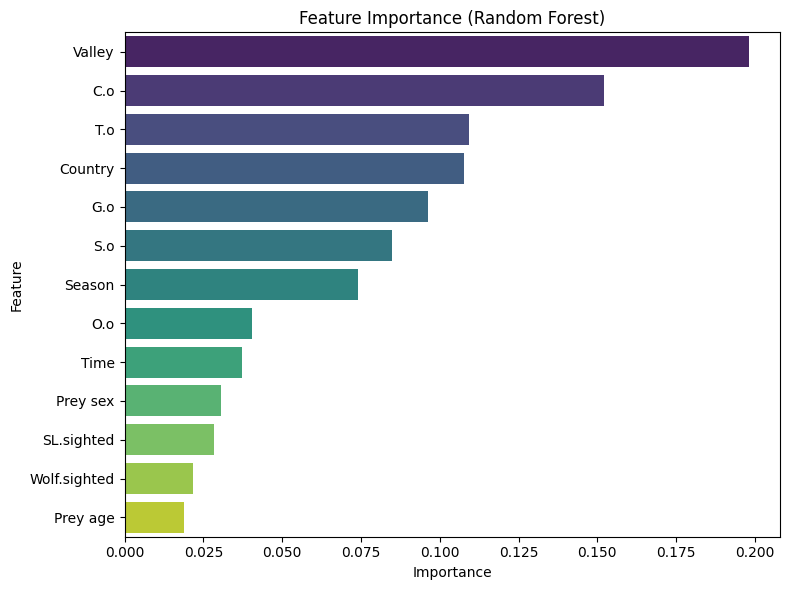

In [ ]:
data = data.copy()
cat_cols = ["Valley", "Season", "Time", 'Prey sex', 'Prey age', 'Country', 'SL.sighted',	'Wolf.sighted']  # Add more if needed
for col in cat_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# --- Define Features and Target ---
X = data[['Valley', 'Season', 'Time', 'Country', 'Prey sex', 'Prey age', 'SL.sighted',	'Wolf.sighted', 'T.o', 'S.o', 'G.o', 'C.o', 'O.o']]
y = data['Predator'].astype('category').cat.codes  # 0 = Wolf, 1 = Snow Leopard
feature_names = X.columns

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled, y_resampled = X, y

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=27, stratify=y_resampled)

# --- Randomized Hyperparameter Tuning ---
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

from sklearn.model_selection import train_test_split, RandomizedSearchCV

rf = RandomForestClassifier(random_state=21)
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=23,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)
clf = random_search.best_estimator_

print("\n🔍 Best Parameters Found:")
print(random_search.best_params_)

# --- Predictions ---
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_train_prob = clf.predict_proba(X_train)[:, 1]
y_test_prob = clf.predict_proba(X_test)[:, 1]

# --- Accuracy & Classification Report ---
print("\n Accuracy (Training):", accuracy_score(y_train, y_train_pred))
print(" Accuracy (Testing):", accuracy_score(y_test, y_test_pred))

print("\n Classification Report (Training):")
print(classification_report(y_train, y_train_pred))

print("\n Classification Report (Testing):")
print(classification_report(y_test, y_test_pred))

# --- Confusion Matrices ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, y_true, y_pred, title in zip(
        axes, [y_train, y_test], [y_train_pred, y_test_pred], ["Training Data", "Testing Data"]):

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Wolf', 'Snow Leopard'], yticklabels=['Wolf', 'Snow Leopard'], ax=ax)
    ax.set_title(f"Confusion Matrix ({title})")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

# --- ROC Curve ---
fig, ax = plt.subplots(figsize=(6, 5))
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

ax.plot(fpr_train, tpr_train, label=f"Train AUC = {roc_auc_train:.2f}", linestyle='--')
ax.plot(fpr_test, tpr_test, label=f"Test AUC = {roc_auc_test:.2f}", color='blue')
ax.plot([0, 1], [0, 1], linestyle="--", color="gray")

ax.set_title("ROC Curve")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend()
plt.show()

# --- Feature Importance ---
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
85 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/


🔍 Best Parameters Found:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}

 Accuracy (Training): 0.9813084112149533
 Accuracy (Testing): 0.8148148148148148

 Classification Report (Training):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       107
           1       0.98      0.98      0.98       107

    accuracy                           0.98       214
   macro avg       0.98      0.98      0.98       214
weighted avg       0.98      0.98      0.98       214


 Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.84      0.78      0.81        27

    accuracy                           0.81        54
   macro avg       0.82      0.81      0.81        54
weighted avg       0.82      0.81      0.81        54



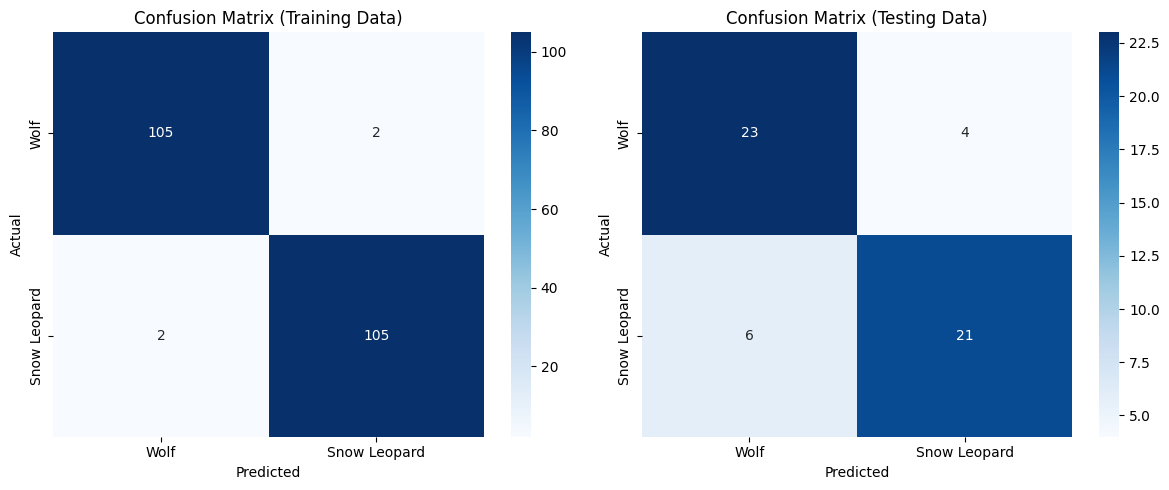

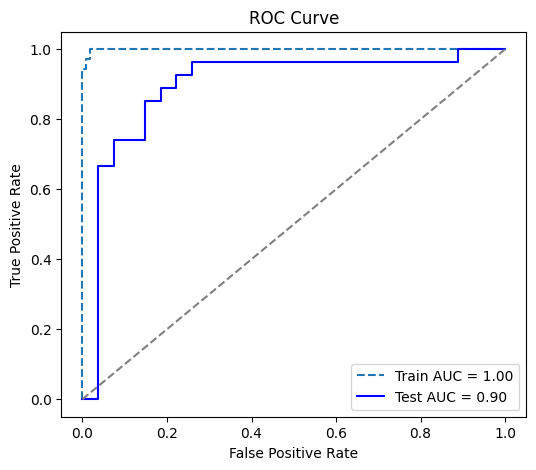

<ipython-input-7-542a8385081e>:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')


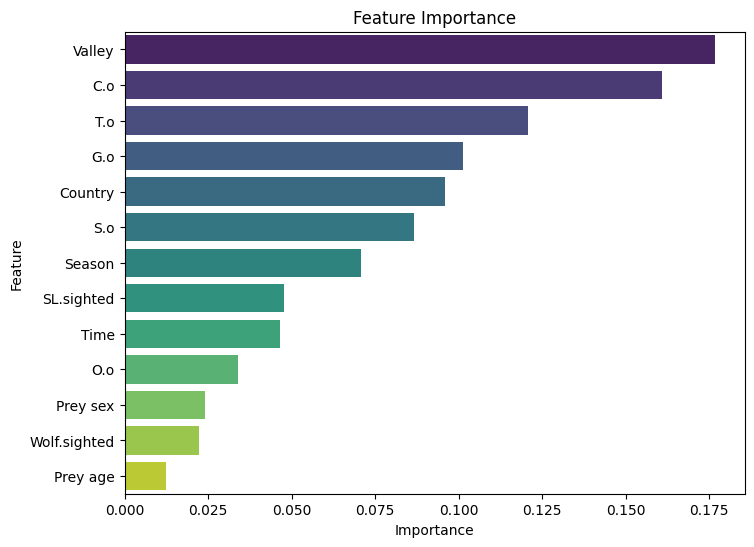

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- Preprocessing ---
categorical_cols = ["Valley", "Season", "Time", 'Prey sex', 'Prey age', 'Country', 'SL.sighted',	'Wolf.sighted']
data[categorical_cols] = data[categorical_cols].apply(lambda col: col.astype('category').cat.codes)

X = data[['Valley', 'Season', 'Time', 'Prey sex', 'Prey age', 'Country', 'SL.sighted',	'Wolf.sighted', 'T.o', 'S.o', 'G.o', 'C.o', 'O.o']]
y = data['Predator'].astype('category').cat.codes
feature_names = X.columns

# If you're using resampled data (e.g., from SMOTE or oversampling)
# Replace X and y with X_resampled and y_resampled below if needed
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=27, stratify=y_resampled)

# --- Hyperparameter grid ---
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# --- Randomized Search CV ---
rf = RandomForestClassifier(random_state=21)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy'
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)
clf = random_search.best_estimator_  # Best model

print("\n🔍 Best Parameters Found:")
print(random_search.best_params_)

# --- Model Evaluation ---
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

y_train_prob = clf.predict_proba(X_train)[:, 1]
y_test_prob = clf.predict_proba(X_test)[:, 1]

print("\n Accuracy (Training):", accuracy_score(y_train, y_train_pred))
print(" Accuracy (Testing):", accuracy_score(y_test, y_test_pred))

print("\n Classification Report (Training):")
print(classification_report(y_train, y_train_pred))

print("\n Classification Report (Testing):")
print(classification_report(y_test, y_test_pred))

# --- Confusion Matrices ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, y_true, y_pred, title in zip(
        axes, [y_train, y_test], [y_train_pred, y_test_pred], ["Training Data", "Testing Data"]):

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Wolf', 'Snow Leopard'], yticklabels=['Wolf', 'Snow Leopard'], ax=ax)
    ax.set_title(f"Confusion Matrix ({title})")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

# --- AUC-ROC Curve ---
fig, ax = plt.subplots(figsize=(6, 5))

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

ax.plot(fpr_train, tpr_train, label=f"Train AUC = {roc_auc_train:.2f}", linestyle='--')
ax.plot(fpr_test, tpr_test, label=f"Test AUC = {roc_auc_test:.2f}", color='blue')

ax.plot([0, 1], [0, 1], linestyle="--", color="gray")
ax.set_title("ROC Curve")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend()
plt.show()

# --- Feature Importance ---
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': clf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance")
plt.show()


Fitting 3 folds for each of 2 candidates, totalling 6 fits

🔍 Best Parameters Found:
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}

 Accuracy (Training): 1.0
 Accuracy (Testing): 0.86

 Classification Report (Training):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        91

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198


 Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.83      0.87      0.85        23

    accuracy                           0.86        50
   macro avg       0.86      0.86      0.86        50
weighted avg       0.86      0.86      0.86        50



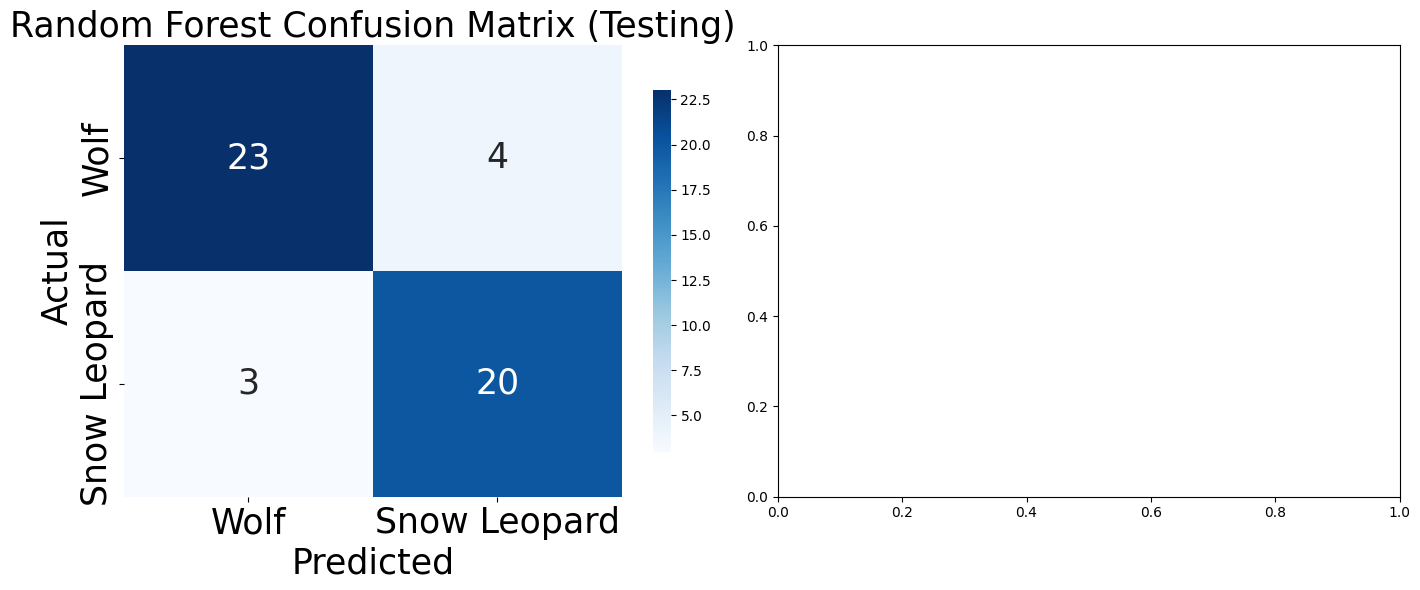

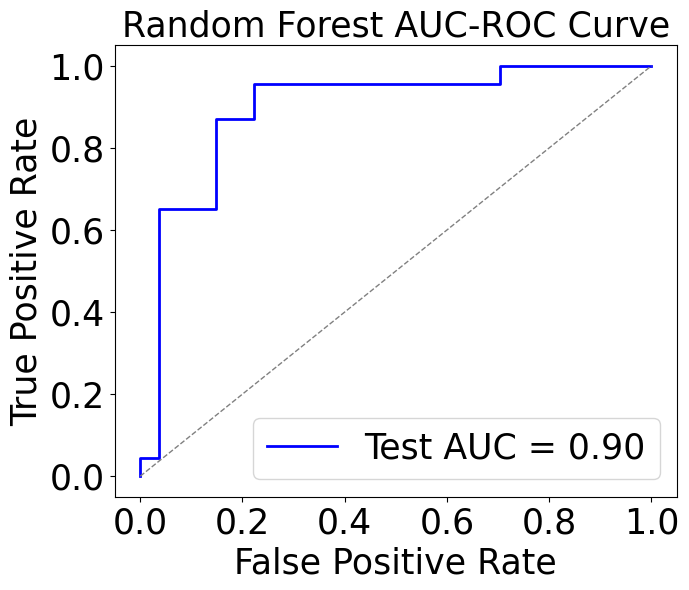

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# --- Encode Categorical Features ---
data = data.copy()
cat_cols = ['Valley', 'Season', 'Time']  # Add more if needed
for col in cat_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# --- Define Features and Target ---
X = data[['Valley', 'Season', 'Time', 'T.o', 'S.o', 'G.o', 'C.o', 'O.o']]
y = data['Predator'].astype('category').cat.codes  # 0 = Wolf, 1 = Snow Leopard
feature_names = X.columns

# --- OPTIONAL: Use Resampled Data (e.g., SMOTE)
# X_resampled, y_resampled = smote.fit_resample(X, y)
# For now, we'll use original data:
X_resampled, y_resampled = X, y

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=27, stratify=y_resampled)

# --- Randomized Hyperparameter Tuning ---
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=21)
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_grid,
    n_iter=2,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)
clf = random_search.best_estimator_

print("\n🔍 Best Parameters Found:")
print(random_search.best_params_)

# --- Predictions ---
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_train_prob = clf.predict_proba(X_train)[:, 1]
y_test_prob = clf.predict_proba(X_test)[:, 1]

# --- Accuracy & Classification Report ---
print("\n Accuracy (Training):", accuracy_score(y_train, y_train_pred))
print(" Accuracy (Testing):", accuracy_score(y_test, y_test_pred))

print("\n Classification Report (Training):")
print(classification_report(y_train, y_train_pred))

print("\n Classification Report (Testing):")
print(classification_report(y_test, y_test_pred))

# --- Confusion Matrices ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Slightly larger figure for clarity
for ax, y_true, y_pred, title in zip(
    axes, [y_test], [y_test_pred], ["Testing"]):

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Wolf', 'Snow Leopard'],
                yticklabels=['Wolf', 'Snow Leopard'],
                ax=ax, annot_kws={"size": 25}, cbar_kws={'shrink': 0.8})

    ax.set_title(f"Random Forest Confusion Matrix ({title})", fontsize=25)
    ax.set_xlabel("Predicted", fontsize=25)
    ax.set_ylabel("Actual", fontsize=25)
    ax.tick_params(axis='both', labelsize=25)

plt.tight_layout()
plt.show()

# --- AUC-ROC Curve ---
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test2, tpr_test2, _ = roc_curve(y_test, y_test_prob)
roc_auc_train = roc_auc_score(y_train, y_train_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(7, 6))
plt.plot(fpr_test2, tpr_test2, label=f'Test AUC = {roc_auc_test:.2f}', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1)
plt.title("Random Forest AUC-ROC Curve", fontsize=25)
plt.xlabel("False Positive Rate", fontsize=25)
plt.ylabel("True Positive Rate", fontsize=25)
plt.legend(fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.show()

<ipython-input-8-769be6b652f0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category').cat.codes
<ipython-input-8-769be6b652f0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category').cat.codes
<ipython-input-8-769be6b652f0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

✅ Training Accuracy: 0.9751243781094527
✅ Testing Accuracy: 0.9215686274509803

🧾 Classification Report (Train):
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       100
           1       0.98      0.97      0.98       101

    accuracy                           0.98       201
   macro avg       0.98      0.98      0.98       201
weighted avg       0.98      0.98      0.98       201


🧾 Classification Report (Test):
               precision    recall  f1-score   support

           0       0.96      0.88      0.92        26
           1       0.89      0.96      0.92        25

    accuracy                           0.92        51
   macro avg       0.92      0.92      0.92        51
weighted avg       0.92      0.92      0.92        51



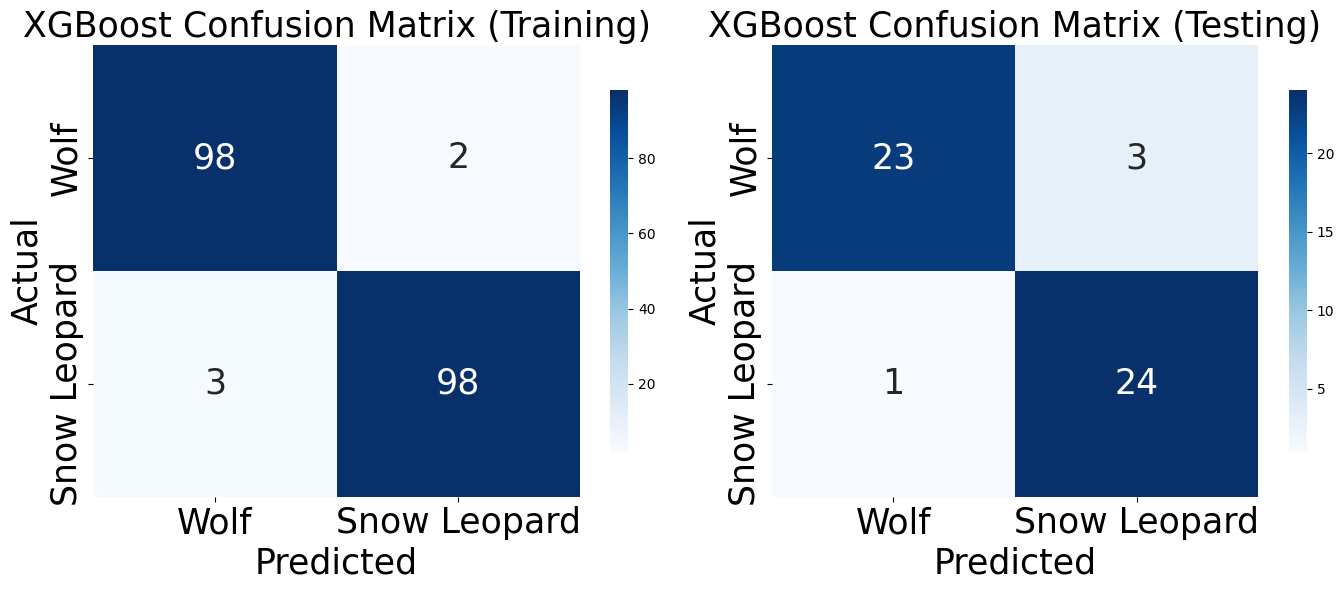

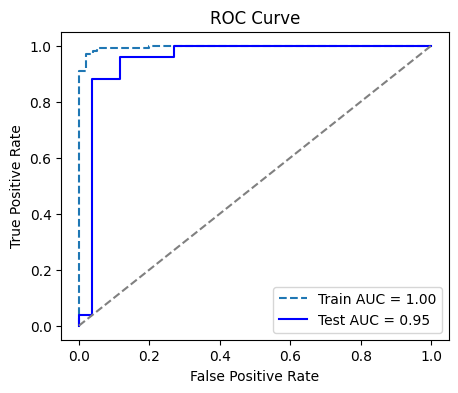

In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek

data = pd.read_csv("/content/FYP - Pamir.csv")

# --- Feature prep ---
X = data[['Valley', 'Season', 'T.o', 'C.o', 'G.o', 'S.o', 'O.o',
          'Time', 'Prey age', 'Prey sex', 'Wolf.sighted', 'SL.sighted']]
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].astype('category').cat.codes

y = data['Predator'].astype('category').cat.codes

# --- Resampling ---
X_resampled, y_resampled = SMOTETomek(random_state=42).fit_resample(X, y)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# --- XGBoost with best found params ---
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=7,
    learning_rate=0.2,
    subsample=0.7,
    colsample_bytree=1.0,
    colsample_bylevel=0.8,
    colsample_bynode=0.6,
    gamma=0,
    reg_alpha=0,
    reg_lambda=5,
    min_child_weight=1,
    scale_pos_weight=1,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

# --- Fit model ---
xgb_model.fit(X_train, y_train)

# --- Predictions & Probabilities ---
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)
y_train_prob = xgb_model.predict_proba(X_train)[:, 1]
y_test_prob = xgb_model.predict_proba(X_test)[:, 1]

# --- Accuracy & Reports ---
print("✅ Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("✅ Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("\n🧾 Classification Report (Train):\n", classification_report(y_train, y_train_pred))
print("\n🧾 Classification Report (Test):\n", classification_report(y_test, y_test_pred))

# --- Confusion Matrices ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Slightly larger figure for clarity
for ax, y_true, y_pred, title in zip(
    axes, [y_train, y_test], [y_train_pred, y_test_pred], ["Training", "Testing"]):

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Wolf', 'Snow Leopard'],
                yticklabels=['Wolf', 'Snow Leopard'],
                ax=ax, annot_kws={"size": 25}, cbar_kws={'shrink': 0.8})

    ax.set_title(f"XGBoost Confusion Matrix ({title})", fontsize=25)
    ax.set_xlabel("Predicted", fontsize=25)
    ax.set_ylabel("Actual", fontsize=25)
    ax.tick_params(axis='both', labelsize=25)

plt.tight_layout()
plt.show()

# --- AUC-ROC Curve ---
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test2, tpr_test2, _ = roc_curve(y_test, y_test_prob)
roc_auc_train = roc_auc_score(y_train, y_train_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

fig, ax = plt.subplots(figsize=(5, 4))

ax.plot(fpr_train, tpr_train, label=f"Train AUC = {roc_auc_train:.2f}", linestyle='--')
ax.plot(fpr_test, tpr_test, label=f"Test AUC = {roc_auc_test:.2f}", color='blue')

ax.plot([0, 1], [0, 1], linestyle="--", color="gray")
ax.set_title("ROC Curve")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend()
plt.show()

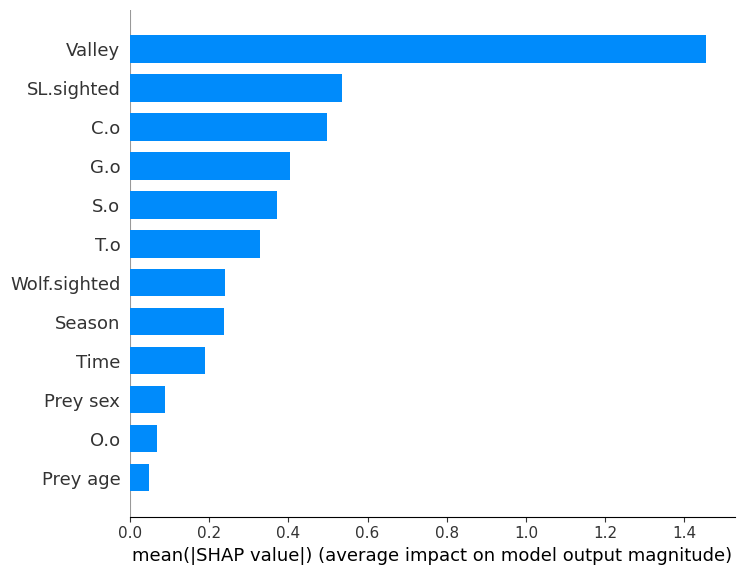

In [ ]:
import shap

# --- Initialize SHAP Explainer ---
explainer = shap.Explainer(xgb_model, X_train)

# --- Compute SHAP Values for Test Data ---
shap_values = explainer(X_test)

# --- Summary Plot (Feature Importance) ---
shap.summary_plot(shap_values, X_test, plot_type="bar")

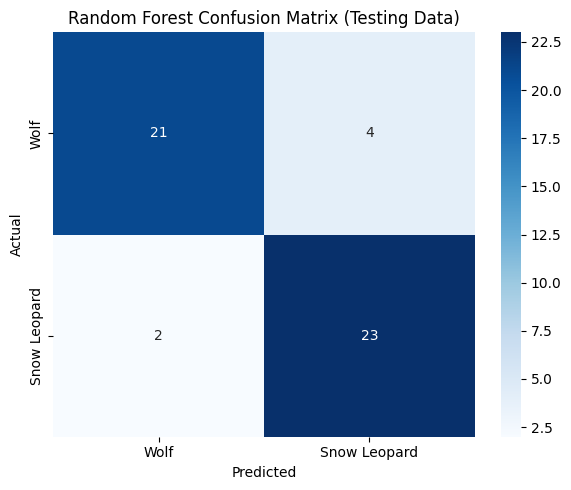

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Example predictions (you can replace with your actual `y_test` and `y_pred`)
# In this case, based on your image:
# 21 true wolves correctly predicted, 4 misclassified as snow leopards
# 23 true snow leopards correctly predicted, 2 misclassified as wolves
conf_matrix = np.array([[21, 4],
                        [2, 23]])

# Plotting
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Wolf', 'Snow Leopard'],
            yticklabels=['Wolf', 'Snow Leopard'])

plt.title("Random Forest Confusion Matrix (Testing Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


# **----------------------------------------------------------------------------------------------------------------------------------**

GUI

In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 96.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.8 MB/s eta 0:00:00


In [ ]:
!python app_gradio.py

python3: can't open file '/content/app_gradio.py': [Errno 2] No such file or directory


In [ ]:
import joblib
joblib.dump(xgb_model, 'model.pkl')

['model.pkl']

In [ ]:
from sklearn.preprocessing import LabelEncoder
import joblib

from sklearn.preprocessing import LabelEncoder
import joblib

cat_cols = ['Valley', 'Season', 'Country', 'Time', 'Prey age', 'Prey sex']
encoders = {}

# Use your full original dataset here
data = pd.read_csv("FYP - Pamir.csv")

for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le

joblib.dump(encoders, "encoders.pkl")


# Save the encoders
joblib.dump(encoders, "encoders.pkl")
joblib.dump(xgb_model, "model.pkl")



['model.pkl']

In [ ]:
encoders = joblib.load("encoders.pkl")
print(encoders['Time'].classes_)   # ['Evening' 'Morning' 'Night']


['Evening' 'Morning' 'Night']


In [ ]:
code = '''
import gradio as gr
import pandas as pd
import joblib

# Load model and encoders
model = joblib.load("model.pkl")
encoders = joblib.load("encoders.pkl")

categorical_features = ['Valley', 'Season', 'Country', 'Time', 'Prey age', 'Prey sex']
numeric_features = ['T.o', 'C.o', 'G.o', 'S.o', 'O.o']

def get_choices(col):
    return list(encoders[col].classes_)

def predict(valley, season, country, time, age, sex, T, C, G, S, O):
    input_data = {
        'Valley': valley, 'Season': season, 'Country': country,
        'Time': time, 'Prey age': age, 'Prey sex': sex,
        'T.o': T, 'C.o': C, 'G.o': G, 'S.o': S, 'O.o': O
    }
    df = pd.DataFrame([input_data])

    # Encode categorical features using the loaded encoders
    for col in categorical_features:
        if col in encoders:  # Ensure the encoder is available for this column
            df[col] = encoders[col].transform(df[col])

    # Make prediction
    probs = model.predict_proba(df)[0]
    return f"🧊 Snow Leopard: {probs[1]*100:.1f}%\\n🐺 Wolf: {probs[0]*100:.1f}%"

demo = gr.Interface(
    fn=predict,
    inputs=[
        gr.Dropdown(label="Valley", choices=get_choices("Valley")),
        gr.Dropdown(label="Season", choices=get_choices("Season")),
        gr.Dropdown(label="Time", choices=get_choices("Time")),
        gr.Dropdown(label="Prey Age", choices=get_choices("Prey age")),
        gr.Dropdown(label="Prey Sex", choices=get_choices("Prey sex")),
        gr.Number(label="Total Livestock (T.o)", value=30),
        gr.Number(label="Cattle (C.o)", value=10),
        gr.Number(label="Goats (G.o)", value=5),
        gr.Number(label="Sheep (S.o)", value=7),
        gr.Number(label="Other (O.o)", value=2)
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="🐾 Predator Risk Predictor",
    description="Predict if Snow Leopard or Wolf is more likely based on conditions."
)

demo.launch(share=True)
'''
with open("app_gradio.py", "w") as f:
    f.write(code)


In [ ]:
!python app_gradio.py

/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1018: UserWarning: Expected 11 arguments for function <function predict at 0x7a1ee050e160>, received 10.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1022: UserWarning: Expected at least 11 arguments for function <function predict at 0x7a1ee050e160>, received 10.
  warnings.warn(
* Running on local URL:  http://127.0.0.1:7862
* Running on public URL: https://316b1941e684b7b29d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
/usr/local/lib/python3.11/dist-packages/gradio/helpers.py:977: UserWarning: Unexpected argument. Filling with None.
  warnings.warn("Unexpected argument. Filling with None.")
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_encode.py", line 235, in _encode
    retur

# **-------------------------------------------------------**

## **Logistic Regression**

Fitting 5 folds for each of 40 candidates, totalling 200 fits
🔍 Best Parameters:
{'log_reg__C': np.float64(4.732149251619493), 'log_reg__l1_ratio': np.float64(1.0), 'log_reg__penalty': 'elasticnet'}

✅ Accuracy (Training): 0.935
✅ Accuracy (Testing): 0.78

🧾 Classification Report (Training):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       109
           1       0.95      0.90      0.93        91

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200


🧾 Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.80      0.70      0.74        23

    accuracy                           0.78        50
   macro avg       0.78      0.77      0.78        50
weighted avg       0.78      0.78      0.78        50



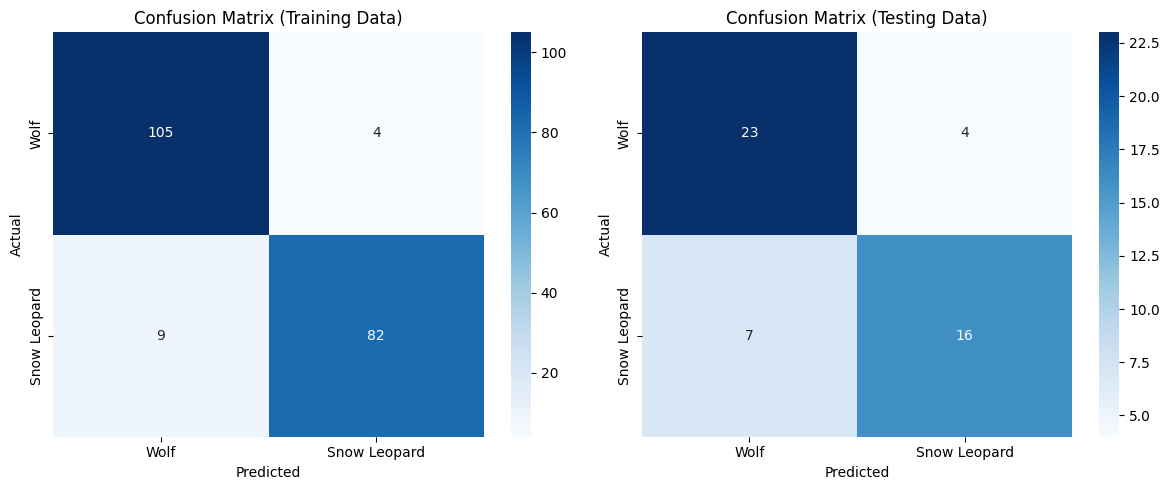

<ipython-input-20-48cab95a7caa>:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df.head(15), x='Coefficient', y='Feature', palette='coolwarm')


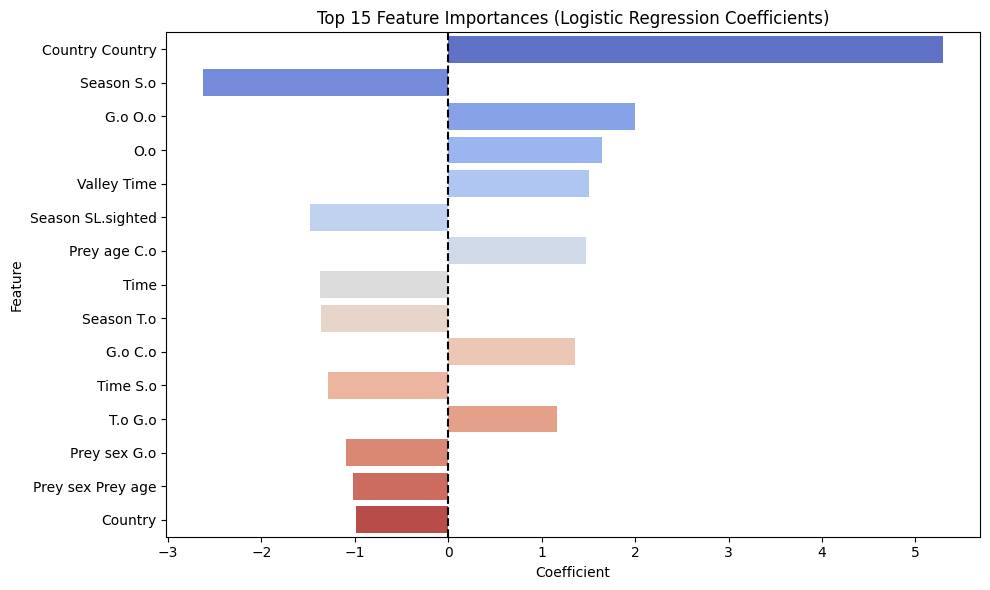

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import uniform

# --- Preprocessing (if not done earlier) ---
cat_cols = ["Valley", "Season", "Time", 'Prey sex', 'Prey age', 'Country', 'SL.sighted',	'Wolf.sighted']
for col in cat_cols:
    data[col] = data[col].astype('category').cat.codes

X = data[['Valley', 'Season', 'Time', 'Country', 'Prey sex', 'Prey age', 'Country', 'SL.sighted',	'Wolf.sighted', 'T.o', 'S.o', 'G.o', 'C.o', 'O.o']]
y = data['Predator'].astype('category').cat.codes  # 0 = Wolf, 1 = Snow Leopard
feature_names = X.columns

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Define Pipeline ---
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=10000, solver='saga'))
])

# --- Randomized Hyperparameter Grid ---
param_grid = {
    'log_reg__penalty': ['l1', 'l2', 'elasticnet'],
    'log_reg__C': uniform(0.01, 10),
    'log_reg__l1_ratio': np.linspace(0, 1, 5)  # Only used if penalty='elasticnet'
}

# --- Randomized Search ---
search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=40,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

print("🔍 Best Parameters:")
print(search.best_params_)

# --- Predictions ---
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# --- Accuracy & Reports ---
print("\n✅ Accuracy (Training):", accuracy_score(y_train, y_train_pred))
print("✅ Accuracy (Testing):", accuracy_score(y_test, y_test_pred))

print("\n🧾 Classification Report (Training):")
print(classification_report(y_train, y_train_pred))

print("\n🧾 Classification Report (Testing):")
print(classification_report(y_test, y_test_pred))

# --- Confusion Matrix ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, y_true, y_pred, title in zip(
        axes, [y_train, y_test], [y_train_pred, y_test_pred], ["Training Data", "Testing Data"]):

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Wolf', 'Snow Leopard'], yticklabels=['Wolf', 'Snow Leopard'], ax=ax)
    ax.set_title(f"Confusion Matrix ({title})")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

# --- Feature Importance ---
# Get feature names from polynomial transform
poly_features = best_model.named_steps['poly'].get_feature_names_out(feature_names)
coefs = best_model.named_steps['log_reg'].coef_[0]

# Create dataframe and sort
coef_df = pd.DataFrame({
    'Feature': poly_features,
    'Coefficient': coefs,
    'Abs_Coefficient': np.abs(coefs)
}).sort_values(by='Abs_Coefficient', ascending=False)

# Plot top N
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df.head(15), x='Coefficient', y='Feature', palette='coolwarm')
plt.axvline(0, color='black', linestyle='--')
plt.title("Top 15 Feature Importances (Logistic Regression Coefficients)")
plt.tight_layout()
plt.show()


# **Custom LR**

In [ ]:
def polynomial_features(X, degree=2):
    poly_X = X.copy()
    for d in range(2, degree + 1):
        poly_X = np.hstack((poly_X, X ** d))
    return poly_X

X_train_poly = polynomial_features(X_train, degree=2)
X_test_poly = polynomial_features(X_test, degree=2)


Accuracy (Training): 0.84
Accuracy (Testing): 0.78

Classification Report (Training):
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       109
           1       0.81      0.85      0.83        91

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200


Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.75      0.78      0.77        23

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



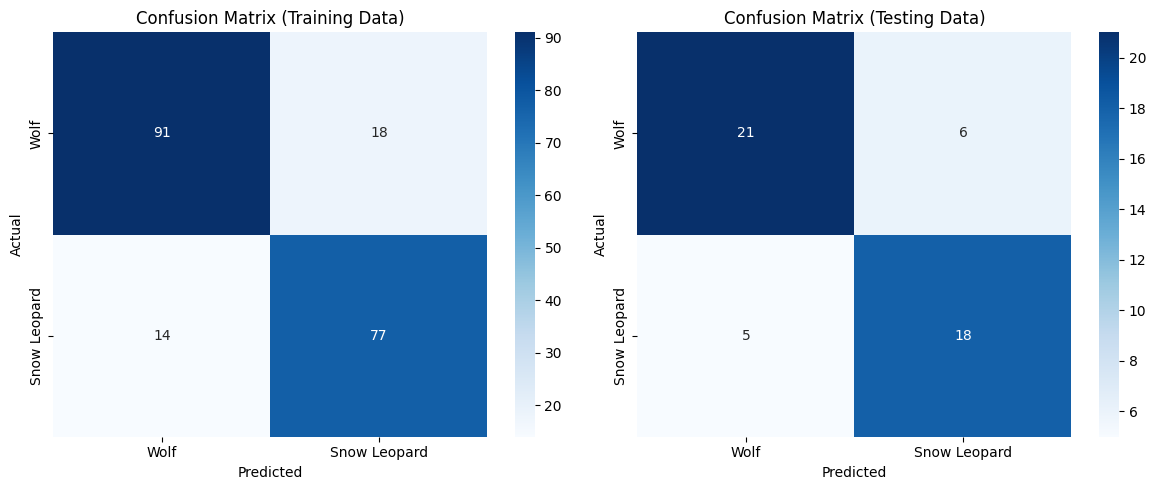

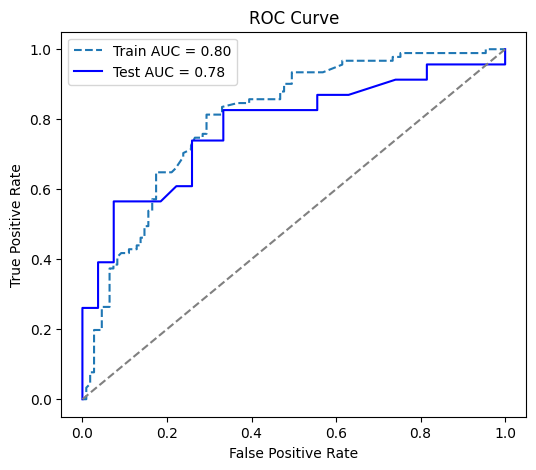

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def polynomial_features(X, degree=2):
    poly_X = X.copy()
    for d in range(2, degree + 1):
        poly_X = np.hstack((poly_X, X ** d))
    return poly_X

X_train_poly = polynomial_features(X_train, degree=2)
X_test_poly = polynomial_features(X_test, degree=2)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Log Reg (poly)
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear_output = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(linear_output)

            # gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # weights
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_output)
        return np.where(y_pred >= 0.5, 1, 0)

clf = MyLogisticRegression()
clf.fit(X_train_poly, y_train)

y_train_pred = clf.predict(X_train_poly)
y_test_pred = clf.predict(X_test_poly)

print("\nAccuracy (Training):", accuracy_score(y_train, y_train_pred))
print("Accuracy (Testing):", accuracy_score(y_test, y_test_pred))

print("\nClassification Report (Training):")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report (Testing):")
print(classification_report(y_test, y_test_pred))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, y_true, y_pred, title in zip(
        axes, [y_train, y_test], [y_train_pred, y_test_pred], ["Training Data", "Testing Data"]):

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Wolf', 'Snow Leopard'], yticklabels=['Wolf', 'Snow Leopard'], ax=ax)
    ax.set_title(f"Confusion Matrix ({title})")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

ax.plot(fpr_train, tpr_train, label=f"Train AUC = {roc_auc_train:.2f}", linestyle='--')
ax.plot(fpr_test, tpr_test, label=f"Test AUC = {roc_auc_test:.2f}", color='blue')

ax.plot([0, 1], [0, 1], linestyle="--", color="gray")
ax.set_title("ROC Curve")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend()
plt.show()


# **SVM**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_svm = SVC(**best_params)
best_svm.fit(X_train, y_train)

y_pred = best_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_svm = SVC(**best_params)
best_svm.fit(X_train, y_train)

y_pred = best_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best Hyperparameters: {'C': 10, 'gamma': 1, 'kernel': 'poly'}
Optimized Model Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

          SL       0.77      0.89      0.83        27
        Wolf       0.88      0.75      0.81        28

    accuracy                           0.82        55
   macro avg       0.82      0.82      0.82        55
weighted avg       0.83      0.82      0.82        55

Confusion Matrix:
 [[24  3]
 [ 7 21]]
Best Hyperparameters: {'C': 10, 'gamma': 1, 'kernel': 'poly'}
Optimized Model Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

          SL       0.77      0.89      0.83        27
        Wolf       0.88      0.75      0.81        28

    accuracy                           0.82        55
   macro avg       0.82      0.82      0.82        55
weighted avg       0.83      0.82      0.82        55

Confusion Matrix:
 [[24  3]
 [ 7 21]]
